In [146]:
import pandas as pd
import numpy as np

In [147]:
pd.set_option('display.max_columns', None) ## 모든 열 출력
pd.set_option('display.max_rows', None) ## 모든 행 출력

In [148]:
pre_season = pd.read_csv("Pre_Season_Batter.csv")
pre_season['position'] = pre_season['position'].str.replace(r"\(.*\)","")
pre_season

batter_id batter_name  year  team    avg    G   AB   R   H  2B  3B  HR  \
0             0        가르시아  2018    LG  0.350    7   20   1   7   1   0   1   
1             1         강경학  2011    한화  0.000    4    2   2   0   0   0   0   
2             1         강경학  2014    한화      -    4    0   2   0   0   0   0   
3             1         강경학  2015    한화  0.130   10   23   3   3   0   0   0   
4             1         강경학  2016    한화  0.188   14   32   4   6   1   1   0   
5             1         강경학  2017    한화  0.222   11   36  10   8   0   0   2   
6             2         강구성  2013    NC  0.000    3    4   0   0   0   0   0   
7             2         강구성  2016    NC  0.000    3    1   0   0   0   0   0   
8             2         강구성  2017    NC  1.000    2    1   0   1   0   0   0   
9            69         김태완  2006    한화  0.200   10   15   0   3   0   0   0   
10           69         김태완  2007    한화  0.318    8   22   4   7   3   0   3   
11           69         김태완  2008    한화  0.375   10   24   3   9   1   0   1   
12           69         김태완  2009    한화  0.320   10   25   5   8   3   0   1   
13           69         김태완  2010    한화  0.400    2    5   2   2   0   1   0   
14           69         김태완  2013    한화  0.250    9   28   3   7   0   0   0   
15           69         김태완  2014    한화  0.125   10   16   1   2   0   0   0   
16           69         김태완  2016    한화  0.000    3    3   0   0   0   0   0   
17           69         김태완  2017    넥센  0.370   12   27   2  10   1   0   1   
18           69         김태완  2018    넥센  0.375    5    8   2   3   1   0   1   
19            3         강민국  2014    NC  0.000    2    1   0   0   0   0   0   
20            3         강민국  2015    NC  0.100    9   10   2   1   1   0   0   
21            3         강민국  2016    NC  0.316   16   19   2   6   2   1   0   
22            4         강민호  2005    롯데  0.250   11   20   2   5   4   0   0   
23            4         강민호  2006    롯데  0.381    9   21   6   8   1   1   2   
24            4         강민호  2007    롯데  0.136   10   22   2   3   0   0   0   
25            4         강민호  2008    롯데  0.200    5   10   0   2   1   0   0   
26            4         강민호  2009    롯데  0.167    2    6   0   1   0   0   0   
27            4         강민호  2010    롯데  0.261   10   23   8   6   1   0   4   
28            4         강민호  2011    롯데  0.353   13   34   4  12   3   0   2   
29            4         강민호  2012    롯데  0.273    5   11   2   3   0   0   0   
30            4         강민호  2013    롯데  0.333    6   15   2   5   1   0   1   
31            4         강민호  2014    롯데  0.100    8   10   1   1   0   0   0   
32            4         강민호  2015    롯데  0.158   10   19   1   3   0   0   1   
33            4         강민호  2016    롯데  0.095   10   21   3   2   0   0   0   
34            4         강민호  2017    롯데  0.300   10   20   1   6   0   0   0   
35            4         강민호  2018    삼성  0.300    4   10   3   3   1   0   2   
36            5         강백호  2018    KT  0.333    6   18   2   6   1   0   0   
37            8         강상원  2016    한화      -    6    0   1   0   0   0   0   
38            8         강상원  2017    한화  0.000   10    1   4   0   0   0   0   
39            8         강상원  2018    한화  0.000    6    8   1   0   0   0   0   
40            9         강승호  2013    LG  0.250    7   12   2   3   2   0   0   
41            9         강승호  2016    LG  0.250   13   32   1   8   0   2   0   
42            9         강승호  2017    LG  0.227   12   22   5   5   2   1   0   
43            9         강승호  2018    SK  0.222    6   18   1   4   1   0   1   
44           11         강진성  2017    NC  0.000    3    4   0   0   0   0   0   
45           11         강진성  2018    NC  0.250    6    8   1   2   0   0   0   
46           12         강한울  2014   KIA  0.207   12   29   5   6   2   0   1   
47           12         강한울  2015   KIA  0.600    3   10   2   6   0   1   0   
48           12         강한울  2017    삼성  0.222   10   18   2   4   1   0   0   
49    

In [ ]:
regular_season = pd.read_csv("Regular_Season_Batter.csv")
regular_season['position'] = regular_season['position'].str.replace(r"\(.*\)","")
regular_season

In [150]:
# 'height/weight' 열을 '/'를 기준으로 나누고, 각각 'height'와 'weight' 열로 저장
pre_season[['height', 'weight']] = pre_season['height/weight'].str.split('/', expand=True)

# 'height'와 'weight' 열의 값을 숫자로 변환
pre_season['height'] = pd.to_numeric(pre_season['height'].str.extract('(\d+)')[0])
pre_season['weight'] = pd.to_numeric(pre_season['weight'].str.extract('(\d+)')[0])

# BMI 계산 및 소수 둘째 자리까지 반올림
pre_season['BMI'] = pre_season['weight'] / ((pre_season['height'] / 100) ** 2)
pre_season['BMI'] = pre_season['BMI'].round(1)

# 'year_born' 열을 날짜 형식으로 변환
pre_season['year_born'] = pd.to_datetime(pre_season['year_born'], format='%Y년 %m월 %d일')

# 'year'와 'year_born'을 사용하여 'age' 열 생성
pre_season['age'] = pre_season['year'] - pre_season['year_born'].dt.year + 1

pre_season

batter_id batter_name  year  team    avg    G   AB   R   H  2B  3B  HR  \
0             0        가르시아  2018    LG  0.350    7   20   1   7   1   0   1   
1             1         강경학  2011    한화  0.000    4    2   2   0   0   0   0   
2             1         강경학  2014    한화      -    4    0   2   0   0   0   0   
3             1         강경학  2015    한화  0.130   10   23   3   3   0   0   0   
4             1         강경학  2016    한화  0.188   14   32   4   6   1   1   0   
5             1         강경학  2017    한화  0.222   11   36  10   8   0   0   2   
6             2         강구성  2013    NC  0.000    3    4   0   0   0   0   0   
7             2         강구성  2016    NC  0.000    3    1   0   0   0   0   0   
8             2         강구성  2017    NC  1.000    2    1   0   1   0   0   0   
9            69         김태완  2006    한화  0.200   10   15   0   3   0   0   0   
10           69         김태완  2007    한화  0.318    8   22   4   7   3   0   3   
11           69         김태완  2008    한화  0.375   10   24   3   9   1   0   1   
12           69         김태완  2009    한화  0.320   10   25   5   8   3   0   1   
13           69         김태완  2010    한화  0.400    2    5   2   2   0   1   0   
14           69         김태완  2013    한화  0.250    9   28   3   7   0   0   0   
15           69         김태완  2014    한화  0.125   10   16   1   2   0   0   0   
16           69         김태완  2016    한화  0.000    3    3   0   0   0   0   0   
17           69         김태완  2017    넥센  0.370   12   27   2  10   1   0   1   
18           69         김태완  2018    넥센  0.375    5    8   2   3   1   0   1   
19            3         강민국  2014    NC  0.000    2    1   0   0   0   0   0   
20            3         강민국  2015    NC  0.100    9   10   2   1   1   0   0   
21            3         강민국  2016    NC  0.316   16   19   2   6   2   1   0   
22            4         강민호  2005    롯데  0.250   11   20   2   5   4   0   0   
23            4         강민호  2006    롯데  0.381    9   21   6   8   1   1   2   
24            4         강민호  2007    롯데  0.136   10   22   2   3   0   0   0   
25            4         강민호  2008    롯데  0.200    5   10   0   2   1   0   0   
26            4         강민호  2009    롯데  0.167    2    6   0   1   0   0   0   
27            4         강민호  2010    롯데  0.261   10   23   8   6   1   0   4   
28            4         강민호  2011    롯데  0.353   13   34   4  12   3   0   2   
29            4         강민호  2012    롯데  0.273    5   11   2   3   0   0   0   
30            4         강민호  2013    롯데  0.333    6   15   2   5   1   0   1   
31            4         강민호  2014    롯데  0.100    8   10   1   1   0   0   0   
32            4         강민호  2015    롯데  0.158   10   19   1   3   0   0   1   
33            4         강민호  2016    롯데  0.095   10   21   3   2   0   0   0   
34            4         강민호  2017    롯데  0.300   10   20   1   6   0   0   0   
35            4         강민호  2018    삼성  0.300    4   10   3   3   1   0   2   
36            5         강백호  2018    KT  0.333    6   18   2   6   1   0   0   
37            8         강상원  2016    한화      -    6    0   1   0   0   0   0   
38            8         강상원  2017    한화  0.000   10    1   4   0   0   0   0   
39            8         강상원  2018    한화  0.000    6    8   1   0   0   0   0   
40            9         강승호  2013    LG  0.250    7   12   2   3   2   0   0   
41            9         강승호  2016    LG  0.250   13   32   1   8   0   2   0   
42            9         강승호  2017    LG  0.227   12   22   5   5   2   1   0   
43            9         강승호  2018    SK  0.222    6   18   1   4   1   0   1   
44           11         강진성  2017    NC  0.000    3    4   0   0   0   0   0   
45           11         강진성  2018    NC  0.250    6    8   1   2   0   0   0   
46           12         강한울  2014   KIA  0.207   12   29   5   6   2   0   1   
47           12         강한울  2015   KIA  0.600    3   10   2   6   0   1   0   
48           12         강한울  2017    삼성  0.222   10   18   2   4   1   0   0   
49    

In [151]:
# 'height/weight' 열을 '/'를 기준으로 나누고, 각각 'height'와 'weight' 열로 저장
regular_season[['height', 'weight']] = regular_season['height/weight'].str.split('/', expand=True)

# 'height'와 'weight' 열의 값을 숫자로 변환
regular_season['height'] = pd.to_numeric(regular_season['height'].str.extract('(\d+)')[0])
regular_season['weight'] = pd.to_numeric(regular_season['weight'].str.extract('(\d+)')[0])

# BMI 계산 및 소수 둘째 자리까지 반올림
regular_season['BMI'] = regular_season['weight'] / ((regular_season['height'] / 100) ** 2)
regular_season['BMI'] = regular_season['BMI'].round(1)

# 'year_born' 열을 날짜 형식으로 변환
regular_season['year_born'] = pd.to_datetime(regular_season['year_born'], format='%Y년 %m월 %d일')

# 'year'와 'year_born'을 사용하여 'age' 열 생성
regular_season['age'] = regular_season['year'] - regular_season['year_born'].dt.year + 1

regular_season

batter_id batter_name  year  team    avg    G   AB    R    H  2B  3B  \
0             0        가르시아  2018    LG  0.339   50  183   27   62   9   0   
1             1         강경학  2011    한화  0.000    2    1    0    0   0   0   
2             1         강경학  2014    한화  0.221   41   86   11   19   2   3   
3             1         강경학  2015    한화  0.257  120  311   50   80   7   4   
4             1         강경학  2016    한화  0.158   46  101   16   16   3   2   
5             1         강경학  2017    한화  0.214   59   84   17   18   2   1   
6             1         강경학  2018    한화  0.278   77  245   42   68  11   1   
7             2         강구성  2013    NC  0.000    2    2    0    0   0   0   
8             2         강구성  2015    NC  0.200    4    5    0    1   1   0   
9             2         강구성  2016    NC  0.000    2    3    0    0   0   0   
10            2         강구성  2017    NC  0.000    1    1    0    0   0   0   
11            2         강구성  2018    NC  0.200    4    5    0    1   1   0   
12          138         백승룡  2005    한화  0.127   39   63    9    8   2   0   
13          138         백승룡  2006    한화  0.139   37   36    6    5   2   0   
14          138         백승룡  2007    한화  0.000    8    4    3    0   0   0   
15          138         백승룡  2008    한화  0.000    2    1    0    0   0   0   
16          138         백승룡  2011    한화  0.176   38   51    7    9   2   0   
17          138         백승룡  2012    한화  0.231   33   52    3   12   1   0   
18          138         백승룡  2013    한화    NaN    2    0    0    0   0   0   
19          297         진갑용  1997    OB  0.242   95  281   21   68   7   0   
20          297         진갑용  1998    OB  0.269   88  253   12   68  14   1   
21          297         진갑용  1999    삼성  0.212   68  156   13   33   3   0   
22          297         진갑용  2000    삼성  0.273  114  297   30   81  14   0   
23          297         진갑용  2001    삼성  0.306   89  314   54   96  25   2   
24          297         진갑용  2002    삼성  0.281  133  462   58  130  29   1   
25          297         진갑용  2003    삼성  0.290  126  435   64  126  20   2   
26          297         진갑용  2004    삼성  0.278  129  439   60  122  20   0   
27          297         진갑용  2005    삼성  0.288  110  347   34  100  17   0   
28          297         진갑용  2006    삼성  0.288  110  358   28  103  22   0   
29          297         진갑용  2007    삼성  0.246  122  362   28   89  12   0   
30          297         진갑용  2008    삼성  0.279  105  272   34   76   7   0   
31          297         진갑용  2009    삼성  0.232   57  142   10   33   3   1   
32          297         진갑용  2010    삼성  0.263  100  259   36   68   8   0   
33          297         진갑용  2011    삼성  0.273  112  286   26   78   7   0   
34          297         진갑용  2012    삼성  0.307  114  313   27   96  15   1   
35          297         진갑용  2013    삼성  0.271  101  181   22   49   9   0   
36          297         진갑용  2014    삼성  0.412   11   17    2    7   0   0   
37          297         진갑용  2015    삼성  0.324   39   68    8   22   2   0   
38            3         강민국  2014    NC  0.000    6    3    0    0   0   0   
39            3         강민국  2015    NC  0.000    1    2    0    0   0   0   
40            3         강민국  2016    NC  0.130   24   23    2    3   1   0   
41            3         강민국  2018    NC  0.250    6    4    0    1   0   0   
42            4         강민호  2004    롯데  0.000    3    5    0    0   0   0   
43            4         강민호  2005    롯데  0.243  104  214   20   52  11   2   
44            4         강민호  2006    롯데  0.251  126  410   40  103  20   0   
45            4         강민호  2007    롯데  0.271  125  413   48  112  20   0   
46            4         강민호  2008    롯데  0.292  122  435   51  127  25   1   
47            4         강민호  2009    롯데  0.260   83  262   36   68  13   0   
48            4         강민호  2010    롯데  0.305  117  410   66  125  19   1   
49            4         강민호  2011    롯데  0.289  124  450   63  130  25   2   
50            4         강민호 

### 결측치 처리: 해당 행의 다른 열을 보고 OPS가 계산할 수 없는 상황인지 확인하고, 계산할 수 없으면 빼기
    - SLG: 타수가 0이면 계산 불가 -> 그대로 NAN 처리
    - OBP: 타수가 0이면 계산 불가 -> 그대로 NAN 처리 (OBP nan이면 타수가 모두 0임을 확인하고)
    - SLG나 OBP 중 NAN이 하나만 있으면 나머지 하나 값이 OPS가 되고, 계산 후 남은 행 중 OPS가 NAN이면 그 행은 제외한다
    
#### SLG = ( 1루타 개수 * 1 + 2루타 개수 * 2 + 3루타 개수 * 3 + 홈런 개수 * 4 ) / 타수
-> SLG = ( (H - (2B+3B+HR)) + 2 * 2B + 3 * 3B + 4 * HR ) / AB

#### OBP = 출루 횟수 / 타수 
-> 가지고 있는 자료로는 출루 횟수를 알 수 없음

In [152]:
# SLG 계산하는 함수
def cal_SLG(row):
    if np.isnan(row['SLG']) and row['AB'] != 0:
        slg = ((row['H'] - (row['2B'] + row['3B'] + row['HR'])) +
               2 * row['2B'] + 3 * row['3B'] + 4 * row['HR']) / row['AB']
        return slg
    else:
        return row['SLG']

In [153]:
SLG_null_pre = pre_season[pre_season['SLG'].isnull()]
SLG_null_pre

batter_id batter_name  year team avg  G  AB  R  H  2B  3B  HR  TB  RBI  \
2             1         강경학  2014   한화   -  4   0  2  0   0   0   0   0    0   
37            8         강상원  2016   한화   -  6   0  1  0   0   0   0   0    0   
74           24         김강민  2003   SK   -  3   0  1  0   0   0   0   0    0   
80           24         김강민  2009   SK   -  2   0  0  0   0   0   0   0    0   
90          101         문선재  2009   LG   -  2   0  1  0   0   0   0   0    0   
99           31         김동욱  2008   삼성   -  1   0  0  0   0   0   0   0    0   
139          39         김민하  2014   롯데   -  1   0  0  0   0   0   0   0    0   
142          40         김사훈  2012   롯데   -  1   0  0  0   0   0   0   0    0   
177          45         김성현  2007   SK   -  1   0  1  0   0   0   0   0    0   
187          46         김성훈  2016   삼성   -  2   0  1  0   0   0   0   0    0   
275          68         김태연  2018   한화   -  1   0  0  0   0   0   0   0    0   
311          81         나원탁  2017   삼성   -  1   0  0  0   0   0   0   0    0   
348          89         도태훈  2016   NC   -  3   0  0  0   0   0   0   0    0   
412         107         박광열  2018   NC   -  3   0  0  0   0   0   0   0    0   
463         116         박세혁  2018   두산   -  1   0  0  0   0   0   0   0    0   
467         119         박용택  2002   LG   -  1   0  0  0   0   0   0   0    0   
543         135         배정대  2014   LG   -  1   0  1  0   0   0   0   0    0   
691         175         양종민  2010   롯데   -  1   0  0  0   0   0   0   0    0   
786         195         윤수강  2018   NC   -  3   0  0  0   0   0   0   0    0   
970         231         이준수  2013   한화   -  1   0  0  0   0   0   0   0    0   
972         232         이준호  2011  KIA   -  1   0  0  0   0   0   0   0    0   
1038        249         임종혁  2014   롯데   -  1   0  1  0   0   0   0   0    0   
1039        249         임종혁  2015   롯데   -  1   0  0  0   0   0   0   0    0   
1041        250          임훈  2005   SK   -  1   0  0  0   0   0   0   0    0   
1068        254         장승현  2014   두산   -  2   0  0  0   0   0   0   0    0   
1082        260         전병우  2018   롯데   -  1   0  0  0   0   0   0   0    0   
1120        269         정상호  2010   SK   -  2   0  0  0   0   0   0   0    0   
1164        275         정주현  2010   LG   -  1   0  1  0   0   0   0   0    0   
1378        341         황윤호  2015   NC   -  2   0  0  0   0   0   0   0    0   

      SB  CS  BB  HBP  SO  GDP  SLG  OBP  E height/weight  year_born  \
2      0   0   0    0   0    0  NaN  NaN  0    180cm/72kg 1992-08-11   
37     2   1   0    0   0    0  NaN  NaN  0    172cm/64kg 1997-05-05   
74     0   0   0    0   0    0  NaN  NaN  0    182cm/85kg 1982-09-13   
80     0   0   0    0   0    0  NaN  NaN  0    182cm/85kg 1982-09-13   
90     0   0   1    0   0    0  NaN  1.0  0    184cm/80kg 1990-05-20   
99     0   0   0    0   0    0  NaN  NaN  0    183cm/89kg 1988-06-24   
139    0   0   0    0   0    0  NaN  NaN  0    181cm/88kg 1989-02-25   
142    0   0   0    0   0    0  NaN  NaN  0    173cm/89kg 1987-06-18   
177    0   0   0    0   0    0  NaN  NaN  0    172cm/72kg 1987-03-09   
187    0   0   0    0   0    0  NaN  NaN  0    172cm/68kg 1993-10-27   
275    0   0   0    0   0    0  NaN  NaN  0    178cm/99kg 1997-06-10   
311    0   0   0    0   0    0  NaN  NaN  0    183cm/93kg 1994-08-20   
348    0   0   1    0   0    0  NaN  1.0  0    184cm/85kg 1993-03-18   
412    0   0   0    0   0    0  NaN  NaN  0    182cm/85kg 1995-08-28   
463    0   0   0    1   0    0  NaN  1.0  0    181cm/86kg 1990-01-09   
467    0   0   0    0   0    0  NaN  NaN  0    185cm/90kg 1979-04-21   
543    0   0   0    0   0    0  NaN  NaN  0    185cm/80kg 1995-06-12   
691    0   0   0    0   0    0  NaN  NaN  0    181cm/81kg 1990-10-09   
786    0   0   0    0   0    0  NaN  NaN  0    181cm/96kg 1990-02-22   
970    0   0   0    0   0    0  NaN  NaN  0    176cm/80kg 1988-06-17   
972    0   0   0    0   0    0  NaN  NaN  0    183cm/89kg 1987-09-07   
1038   0   0   0    0

In [154]:
AB_zero_pre = SLG_null_pre[SLG_null_pre['AB'] == 0]
AB_zero_pre

batter_id batter_name  year team avg  G  AB  R  H  2B  3B  HR  TB  RBI  \
2             1         강경학  2014   한화   -  4   0  2  0   0   0   0   0    0   
37            8         강상원  2016   한화   -  6   0  1  0   0   0   0   0    0   
74           24         김강민  2003   SK   -  3   0  1  0   0   0   0   0    0   
80           24         김강민  2009   SK   -  2   0  0  0   0   0   0   0    0   
90          101         문선재  2009   LG   -  2   0  1  0   0   0   0   0    0   
99           31         김동욱  2008   삼성   -  1   0  0  0   0   0   0   0    0   
139          39         김민하  2014   롯데   -  1   0  0  0   0   0   0   0    0   
142          40         김사훈  2012   롯데   -  1   0  0  0   0   0   0   0    0   
177          45         김성현  2007   SK   -  1   0  1  0   0   0   0   0    0   
187          46         김성훈  2016   삼성   -  2   0  1  0   0   0   0   0    0   
275          68         김태연  2018   한화   -  1   0  0  0   0   0   0   0    0   
311          81         나원탁  2017   삼성   -  1   0  0  0   0   0   0   0    0   
348          89         도태훈  2016   NC   -  3   0  0  0   0   0   0   0    0   
412         107         박광열  2018   NC   -  3   0  0  0   0   0   0   0    0   
463         116         박세혁  2018   두산   -  1   0  0  0   0   0   0   0    0   
467         119         박용택  2002   LG   -  1   0  0  0   0   0   0   0    0   
543         135         배정대  2014   LG   -  1   0  1  0   0   0   0   0    0   
691         175         양종민  2010   롯데   -  1   0  0  0   0   0   0   0    0   
786         195         윤수강  2018   NC   -  3   0  0  0   0   0   0   0    0   
970         231         이준수  2013   한화   -  1   0  0  0   0   0   0   0    0   
972         232         이준호  2011  KIA   -  1   0  0  0   0   0   0   0    0   
1038        249         임종혁  2014   롯데   -  1   0  1  0   0   0   0   0    0   
1039        249         임종혁  2015   롯데   -  1   0  0  0   0   0   0   0    0   
1041        250          임훈  2005   SK   -  1   0  0  0   0   0   0   0    0   
1068        254         장승현  2014   두산   -  2   0  0  0   0   0   0   0    0   
1082        260         전병우  2018   롯데   -  1   0  0  0   0   0   0   0    0   
1120        269         정상호  2010   SK   -  2   0  0  0   0   0   0   0    0   
1164        275         정주현  2010   LG   -  1   0  1  0   0   0   0   0    0   
1378        341         황윤호  2015   NC   -  2   0  0  0   0   0   0   0    0   

      SB  CS  BB  HBP  SO  GDP  SLG  OBP  E height/weight  year_born  \
2      0   0   0    0   0    0  NaN  NaN  0    180cm/72kg 1992-08-11   
37     2   1   0    0   0    0  NaN  NaN  0    172cm/64kg 1997-05-05   
74     0   0   0    0   0    0  NaN  NaN  0    182cm/85kg 1982-09-13   
80     0   0   0    0   0    0  NaN  NaN  0    182cm/85kg 1982-09-13   
90     0   0   1    0   0    0  NaN  1.0  0    184cm/80kg 1990-05-20   
99     0   0   0    0   0    0  NaN  NaN  0    183cm/89kg 1988-06-24   
139    0   0   0    0   0    0  NaN  NaN  0    181cm/88kg 1989-02-25   
142    0   0   0    0   0    0  NaN  NaN  0    173cm/89kg 1987-06-18   
177    0   0   0    0   0    0  NaN  NaN  0    172cm/72kg 1987-03-09   
187    0   0   0    0   0    0  NaN  NaN  0    172cm/68kg 1993-10-27   
275    0   0   0    0   0    0  NaN  NaN  0    178cm/99kg 1997-06-10   
311    0   0   0    0   0    0  NaN  NaN  0    183cm/93kg 1994-08-20   
348    0   0   1    0   0    0  NaN  1.0  0    184cm/85kg 1993-03-18   
412    0   0   0    0   0    0  NaN  NaN  0    182cm/85kg 1995-08-28   
463    0   0   0    1   0    0  NaN  1.0  0    181cm/86kg 1990-01-09   
467    0   0   0    0   0    0  NaN  NaN  0    185cm/90kg 1979-04-21   
543    0   0   0    0   0    0  NaN  NaN  0    185cm/80kg 1995-06-12   
691    0   0   0    0   0    0  NaN  NaN  0    181cm/81kg 1990-10-09   
786    0   0   0    0   0    0  NaN  NaN  0    181cm/96kg 1990-02-22   
970    0   0   0    0   0    0  NaN  NaN  0    176cm/80kg 1988-06-17   
972    0   0   0    0   0    0  NaN  NaN  0    183cm/89kg 1987-09-07   
1038   0   0   0    0

In [155]:
print(SLG_null_pre.shape[0])
print(AB_zero_pre.shape[0])
print(SLG_null_pre.equals(AB_zero_pre))

29
29
True


In [156]:
SLG_null_re = regular_season[regular_season['SLG'].isnull()]
SLG_null_re

batter_id batter_name  year team  avg  G  AB  R  H  2B  3B  HR  TB  RBI  \
18          138         백승룡  2013   한화  NaN  2   0  0  0   0   0   0   0    0   
175          21         권용관  2000   LG  NaN  3   0  0  0   0   0   0   0    0   
200          24         김강민  2002   SK  NaN  1   0  0  0   0   0   0   0    0   
265          31         김동욱  2007   삼성  NaN  1   0  1  0   0   0   0   0    0   
385          45         김성현  2007   SK  NaN  3   0  0  0   0   0   0   0    0   
663          97         마낙길  2015   NC  NaN  1   0  0  0   0   0   0   0    0   
931         132         박해민  2013   삼성  NaN  1   0  0  0   0   0   0   0    0   
1049        151         손주인  2002   삼성  NaN  1   0  0  0   0   0   0   0    0   
1192        173         양영동  2006   삼성  NaN  2   0  0  0   0   0   0   0    0   
1210        175         양종민  2013   롯데  NaN  1   0  1  0   0   0   0   0    0   
1396        200         이대수  2002   SK  NaN  3   0  0  0   0   0   0   0    0   
1527        213         이승재  2007   롯데  NaN  3   0  0  0   0   0   0   0    0   
1661        231         이준수  2014   한화  NaN  3   0  0  0   0   0   0   0    0   
2023        281         정형식  2009   삼성  NaN  1   0  0  0   0   0   0   0    0   
2138        295         지성준  2016   한화  NaN  1   0  0  0   0   0   0   0    0   
2215        305         최민구  2015   삼성  NaN  6   0  1  0   0   0   0   0    1   
2218        307         최승준  2006   LG  NaN  2   0  0  0   0   0   0   0    0   
2232        309         최원제  2008   삼성  NaN  1   0  0  0   0   0   0   0    0   
2233        309         최원제  2009   삼성  NaN  1   0  0  0   0   0   0   0    0   
2245        311         최윤석  2018   한화  NaN  2   0  1  0   0   0   0   0    0   
2246        312         최재훈  2008   두산  NaN  1   0  0  0   0   0   0   0    0   
2345        325         하준호  2009   롯데  NaN  1   0  1  0   0   0   0   0    0   
2362        330         한윤섭  2008   한화  NaN  6   0  2  0   0   0   0   0    0   
2373        332         허도환  2007   두산  NaN  1   0  0  0   0   0   0   0    0   
2416        337         홍재호  2017  KIA  NaN  2   0  0  0   0   0   0   0    0   
2448        344         황진수  2013   롯데  NaN  2   0  0  0   0   0   0   0    0   

      SB  CS  BB  HBP  SO  GDP  SLG  OBP  E height/weight  year_born  \
18     0   0   0    0   0    0  NaN  NaN  0           NaN 1982-08-16   
175    0   0   0    0   0    0  NaN  NaN  0           NaN 1976-11-19   
200    0   1   0    0   0    0  NaN  NaN  0    182cm/85kg 1982-09-13   
265    0   0   0    0   0    0  NaN  NaN  0    183cm/89kg 1988-06-24   
385    0   1   0    0   0    0  NaN  NaN  0    172cm/72kg 1987-03-09   
663    0   1   0    0   0    0  NaN  NaN  0           NaN 1989-06-22   
931    0   0   0    0   0    0  NaN  NaN  0    180cm/75kg 1990-02-24   
1049   0   0   0    0   0    0  NaN  NaN  0    179cm/82kg 1983-12-01   
1192   0   0   0    0   0    0  NaN  NaN  0           NaN 1983-07-16   
1210   0   0   0    0   0    0  NaN  NaN  0    181cm/81kg 1990-10-09   
1396   0   0   0    0   0    0  NaN  NaN  0    175cm/75kg 1981-08-21   
1527   0   0   0    0   0    0  NaN  NaN  0           NaN 1983-06-09   
1661   0   0   1    0   0    0  NaN  1.0  0    176cm/80kg 1988-06-17   
2023   0   0   0    0   0    0  NaN  NaN  0           NaN 1991-01-28   
2138   0   0   0    0   0    0  NaN  NaN  0    180cm/92kg 1994-04-10   
2215   0   0   0    0   0    0  NaN  NaN  0           NaN 1992-03-17   
2218   0   0   0    0   0    0  NaN  NaN  0    188cm/88kg 1988-01-11   
2232   0   0   0    0   0    0  NaN  NaN  0    183cm/95kg 1989-02-04   
2233   0   0   0    0   0    0  NaN  NaN  0    183cm/95kg 1989-02-04   
2245   0   0   2    0   0    0  NaN  1.0  0    175cm/75kg 1987-03-28   
2246   0   0   0    0   0    0  NaN  NaN  0    178cm/76kg 1989-08-27   
2345   0   0   0    0   0    0  NaN  NaN  0    174cm/78kg 1989-04-29   
2362   0   0   0    0   0    0  NaN  NaN  0           NaN 1985-09-12   
2373   0   0   0    0   0    0  NaN  NaN  0    176cm/87kg 1984-07-31   
2416   0   0   0  

In [157]:
AB_zero_re = SLG_null_re[SLG_null_re['AB'] == 0]
AB_zero_re

batter_id batter_name  year team  avg  G  AB  R  H  2B  3B  HR  TB  RBI  \
18          138         백승룡  2013   한화  NaN  2   0  0  0   0   0   0   0    0   
175          21         권용관  2000   LG  NaN  3   0  0  0   0   0   0   0    0   
200          24         김강민  2002   SK  NaN  1   0  0  0   0   0   0   0    0   
265          31         김동욱  2007   삼성  NaN  1   0  1  0   0   0   0   0    0   
385          45         김성현  2007   SK  NaN  3   0  0  0   0   0   0   0    0   
663          97         마낙길  2015   NC  NaN  1   0  0  0   0   0   0   0    0   
931         132         박해민  2013   삼성  NaN  1   0  0  0   0   0   0   0    0   
1049        151         손주인  2002   삼성  NaN  1   0  0  0   0   0   0   0    0   
1192        173         양영동  2006   삼성  NaN  2   0  0  0   0   0   0   0    0   
1210        175         양종민  2013   롯데  NaN  1   0  1  0   0   0   0   0    0   
1396        200         이대수  2002   SK  NaN  3   0  0  0   0   0   0   0    0   
1527        213         이승재  2007   롯데  NaN  3   0  0  0   0   0   0   0    0   
1661        231         이준수  2014   한화  NaN  3   0  0  0   0   0   0   0    0   
2023        281         정형식  2009   삼성  NaN  1   0  0  0   0   0   0   0    0   
2138        295         지성준  2016   한화  NaN  1   0  0  0   0   0   0   0    0   
2215        305         최민구  2015   삼성  NaN  6   0  1  0   0   0   0   0    1   
2218        307         최승준  2006   LG  NaN  2   0  0  0   0   0   0   0    0   
2232        309         최원제  2008   삼성  NaN  1   0  0  0   0   0   0   0    0   
2233        309         최원제  2009   삼성  NaN  1   0  0  0   0   0   0   0    0   
2245        311         최윤석  2018   한화  NaN  2   0  1  0   0   0   0   0    0   
2246        312         최재훈  2008   두산  NaN  1   0  0  0   0   0   0   0    0   
2345        325         하준호  2009   롯데  NaN  1   0  1  0   0   0   0   0    0   
2362        330         한윤섭  2008   한화  NaN  6   0  2  0   0   0   0   0    0   
2373        332         허도환  2007   두산  NaN  1   0  0  0   0   0   0   0    0   
2416        337         홍재호  2017  KIA  NaN  2   0  0  0   0   0   0   0    0   
2448        344         황진수  2013   롯데  NaN  2   0  0  0   0   0   0   0    0   

      SB  CS  BB  HBP  SO  GDP  SLG  OBP  E height/weight  year_born  \
18     0   0   0    0   0    0  NaN  NaN  0           NaN 1982-08-16   
175    0   0   0    0   0    0  NaN  NaN  0           NaN 1976-11-19   
200    0   1   0    0   0    0  NaN  NaN  0    182cm/85kg 1982-09-13   
265    0   0   0    0   0    0  NaN  NaN  0    183cm/89kg 1988-06-24   
385    0   1   0    0   0    0  NaN  NaN  0    172cm/72kg 1987-03-09   
663    0   1   0    0   0    0  NaN  NaN  0           NaN 1989-06-22   
931    0   0   0    0   0    0  NaN  NaN  0    180cm/75kg 1990-02-24   
1049   0   0   0    0   0    0  NaN  NaN  0    179cm/82kg 1983-12-01   
1192   0   0   0    0   0    0  NaN  NaN  0           NaN 1983-07-16   
1210   0   0   0    0   0    0  NaN  NaN  0    181cm/81kg 1990-10-09   
1396   0   0   0    0   0    0  NaN  NaN  0    175cm/75kg 1981-08-21   
1527   0   0   0    0   0    0  NaN  NaN  0           NaN 1983-06-09   
1661   0   0   1    0   0    0  NaN  1.0  0    176cm/80kg 1988-06-17   
2023   0   0   0    0   0    0  NaN  NaN  0           NaN 1991-01-28   
2138   0   0   0    0   0    0  NaN  NaN  0    180cm/92kg 1994-04-10   
2215   0   0   0    0   0    0  NaN  NaN  0           NaN 1992-03-17   
2218   0   0   0    0   0    0  NaN  NaN  0    188cm/88kg 1988-01-11   
2232   0   0   0    0   0    0  NaN  NaN  0    183cm/95kg 1989-02-04   
2233   0   0   0    0   0    0  NaN  NaN  0    183cm/95kg 1989-02-04   
2245   0   0   2    0   0    0  NaN  1.0  0    175cm/75kg 1987-03-28   
2246   0   0   0    0   0    0  NaN  NaN  0    178cm/76kg 1989-08-27   
2345   0   0   0    0   0    0  NaN  NaN  0    174cm/78kg 1989-04-29   
2362   0   0   0    0   0    0  NaN  NaN  0           NaN 1985-09-12   
2373   0   0   0    0   0    0  NaN  NaN  0    176cm/87kg 1984-07-31   
2416   0   0   0  

In [158]:
print(SLG_null_re.shape[0])
print(AB_zero_re.shape[0])
print(SLG_null_re.equals(AB_zero_re))

26
26
True


#### -> SLG가 결측치인 행은 모두 AB값도 결측치라서 SLG 계산이 불가능하다

In [159]:
OBP_null_pre = pre_season[pre_season['OBP'].isnull()]
OBP_null_pre

batter_id batter_name  year team avg  G  AB  R  H  2B  3B  HR  TB  RBI  \
2             1         강경학  2014   한화   -  4   0  2  0   0   0   0   0    0   
37            8         강상원  2016   한화   -  6   0  1  0   0   0   0   0    0   
74           24         김강민  2003   SK   -  3   0  1  0   0   0   0   0    0   
80           24         김강민  2009   SK   -  2   0  0  0   0   0   0   0    0   
99           31         김동욱  2008   삼성   -  1   0  0  0   0   0   0   0    0   
139          39         김민하  2014   롯데   -  1   0  0  0   0   0   0   0    0   
142          40         김사훈  2012   롯데   -  1   0  0  0   0   0   0   0    0   
177          45         김성현  2007   SK   -  1   0  1  0   0   0   0   0    0   
187          46         김성훈  2016   삼성   -  2   0  1  0   0   0   0   0    0   
275          68         김태연  2018   한화   -  1   0  0  0   0   0   0   0    0   
311          81         나원탁  2017   삼성   -  1   0  0  0   0   0   0   0    0   
412         107         박광열  2018   NC   -  3   0  0  0   0   0   0   0    0   
467         119         박용택  2002   LG   -  1   0  0  0   0   0   0   0    0   
543         135         배정대  2014   LG   -  1   0  1  0   0   0   0   0    0   
691         175         양종민  2010   롯데   -  1   0  0  0   0   0   0   0    0   
786         195         윤수강  2018   NC   -  3   0  0  0   0   0   0   0    0   
970         231         이준수  2013   한화   -  1   0  0  0   0   0   0   0    0   
972         232         이준호  2011  KIA   -  1   0  0  0   0   0   0   0    0   
1038        249         임종혁  2014   롯데   -  1   0  1  0   0   0   0   0    0   
1039        249         임종혁  2015   롯데   -  1   0  0  0   0   0   0   0    0   
1041        250          임훈  2005   SK   -  1   0  0  0   0   0   0   0    0   
1082        260         전병우  2018   롯데   -  1   0  0  0   0   0   0   0    0   
1120        269         정상호  2010   SK   -  2   0  0  0   0   0   0   0    0   
1164        275         정주현  2010   LG   -  1   0  1  0   0   0   0   0    0   
1378        341         황윤호  2015   NC   -  2   0  0  0   0   0   0   0    0   

      SB  CS  BB  HBP  SO  GDP  SLG  OBP  E height/weight  year_born  \
2      0   0   0    0   0    0  NaN  NaN  0    180cm/72kg 1992-08-11   
37     2   1   0    0   0    0  NaN  NaN  0    172cm/64kg 1997-05-05   
74     0   0   0    0   0    0  NaN  NaN  0    182cm/85kg 1982-09-13   
80     0   0   0    0   0    0  NaN  NaN  0    182cm/85kg 1982-09-13   
99     0   0   0    0   0    0  NaN  NaN  0    183cm/89kg 1988-06-24   
139    0   0   0    0   0    0  NaN  NaN  0    181cm/88kg 1989-02-25   
142    0   0   0    0   0    0  NaN  NaN  0    173cm/89kg 1987-06-18   
177    0   0   0    0   0    0  NaN  NaN  0    172cm/72kg 1987-03-09   
187    0   0   0    0   0    0  NaN  NaN  0    172cm/68kg 1993-10-27   
275    0   0   0    0   0    0  NaN  NaN  0    178cm/99kg 1997-06-10   
311    0   0   0    0   0    0  NaN  NaN  0    183cm/93kg 1994-08-20   
412    0   0   0    0   0    0  NaN  NaN  0    182cm/85kg 1995-08-28   
467    0   0   0    0   0    0  NaN  NaN  0    185cm/90kg 1979-04-21   
543    0   0   0    0   0    0  NaN  NaN  0    185cm/80kg 1995-06-12   
691    0   0   0    0   0    0  NaN  NaN  0    181cm/81kg 1990-10-09   
786    0   0   0    0   0    0  NaN  NaN  0    181cm/96kg 1990-02-22   
970    0   0   0    0   0    0  NaN  NaN  0    176cm/80kg 1988-06-17   
972    0   0   0    0   0    0  NaN  NaN  0    183cm/89kg 1987-09-07   
1038   0   0   0    0   0    0  NaN  NaN  0    177cm/77kg 1990-04-07   
1039   0   0   0    0   0    0  NaN  NaN  0    177cm/77kg 1990-04-07   
1041   0   0   0    0   0    0  NaN  NaN  0    186cm/86kg 1985-07-17   
1082   0   0   0    0   0    0  NaN  NaN  0    182cm/90kg 1992-10-24   
1120   0   0   0    0   0    0  NaN  NaN  0   187cm/100kg 1982-12-24   
1164   1   0   0    0   0    0  NaN  NaN  0    176cm/76kg 1990-10-13   
1378   0   0   0    0   0    0  NaN  NaN  0    177cm/78kg 1993-09-22   

       position                               career

In [160]:
OBP_AB_zero_pre = OBP_null_pre[OBP_null_pre['AB'] == 0]
OBP_AB_zero_pre

batter_id batter_name  year team avg  G  AB  R  H  2B  3B  HR  TB  RBI  \
2             1         강경학  2014   한화   -  4   0  2  0   0   0   0   0    0   
37            8         강상원  2016   한화   -  6   0  1  0   0   0   0   0    0   
74           24         김강민  2003   SK   -  3   0  1  0   0   0   0   0    0   
80           24         김강민  2009   SK   -  2   0  0  0   0   0   0   0    0   
99           31         김동욱  2008   삼성   -  1   0  0  0   0   0   0   0    0   
139          39         김민하  2014   롯데   -  1   0  0  0   0   0   0   0    0   
142          40         김사훈  2012   롯데   -  1   0  0  0   0   0   0   0    0   
177          45         김성현  2007   SK   -  1   0  1  0   0   0   0   0    0   
187          46         김성훈  2016   삼성   -  2   0  1  0   0   0   0   0    0   
275          68         김태연  2018   한화   -  1   0  0  0   0   0   0   0    0   
311          81         나원탁  2017   삼성   -  1   0  0  0   0   0   0   0    0   
412         107         박광열  2018   NC   -  3   0  0  0   0   0   0   0    0   
467         119         박용택  2002   LG   -  1   0  0  0   0   0   0   0    0   
543         135         배정대  2014   LG   -  1   0  1  0   0   0   0   0    0   
691         175         양종민  2010   롯데   -  1   0  0  0   0   0   0   0    0   
786         195         윤수강  2018   NC   -  3   0  0  0   0   0   0   0    0   
970         231         이준수  2013   한화   -  1   0  0  0   0   0   0   0    0   
972         232         이준호  2011  KIA   -  1   0  0  0   0   0   0   0    0   
1038        249         임종혁  2014   롯데   -  1   0  1  0   0   0   0   0    0   
1039        249         임종혁  2015   롯데   -  1   0  0  0   0   0   0   0    0   
1041        250          임훈  2005   SK   -  1   0  0  0   0   0   0   0    0   
1082        260         전병우  2018   롯데   -  1   0  0  0   0   0   0   0    0   
1120        269         정상호  2010   SK   -  2   0  0  0   0   0   0   0    0   
1164        275         정주현  2010   LG   -  1   0  1  0   0   0   0   0    0   
1378        341         황윤호  2015   NC   -  2   0  0  0   0   0   0   0    0   

      SB  CS  BB  HBP  SO  GDP  SLG  OBP  E height/weight  year_born  \
2      0   0   0    0   0    0  NaN  NaN  0    180cm/72kg 1992-08-11   
37     2   1   0    0   0    0  NaN  NaN  0    172cm/64kg 1997-05-05   
74     0   0   0    0   0    0  NaN  NaN  0    182cm/85kg 1982-09-13   
80     0   0   0    0   0    0  NaN  NaN  0    182cm/85kg 1982-09-13   
99     0   0   0    0   0    0  NaN  NaN  0    183cm/89kg 1988-06-24   
139    0   0   0    0   0    0  NaN  NaN  0    181cm/88kg 1989-02-25   
142    0   0   0    0   0    0  NaN  NaN  0    173cm/89kg 1987-06-18   
177    0   0   0    0   0    0  NaN  NaN  0    172cm/72kg 1987-03-09   
187    0   0   0    0   0    0  NaN  NaN  0    172cm/68kg 1993-10-27   
275    0   0   0    0   0    0  NaN  NaN  0    178cm/99kg 1997-06-10   
311    0   0   0    0   0    0  NaN  NaN  0    183cm/93kg 1994-08-20   
412    0   0   0    0   0    0  NaN  NaN  0    182cm/85kg 1995-08-28   
467    0   0   0    0   0    0  NaN  NaN  0    185cm/90kg 1979-04-21   
543    0   0   0    0   0    0  NaN  NaN  0    185cm/80kg 1995-06-12   
691    0   0   0    0   0    0  NaN  NaN  0    181cm/81kg 1990-10-09   
786    0   0   0    0   0    0  NaN  NaN  0    181cm/96kg 1990-02-22   
970    0   0   0    0   0    0  NaN  NaN  0    176cm/80kg 1988-06-17   
972    0   0   0    0   0    0  NaN  NaN  0    183cm/89kg 1987-09-07   
1038   0   0   0    0   0    0  NaN  NaN  0    177cm/77kg 1990-04-07   
1039   0   0   0    0   0    0  NaN  NaN  0    177cm/77kg 1990-04-07   
1041   0   0   0    0   0    0  NaN  NaN  0    186cm/86kg 1985-07-17   
1082   0   0   0    0   0    0  NaN  NaN  0    182cm/90kg 1992-10-24   
1120   0   0   0    0   0    0  NaN  NaN  0   187cm/100kg 1982-12-24   
1164   1   0   0    0   0    0  NaN  NaN  0    176cm/76kg 1990-10-13   
1378   0   0   0    0   0    0  NaN  NaN  0    177cm/78kg 1993-09-22   

       position                               career

In [161]:
print(OBP_null_pre.shape[0])
print(OBP_AB_zero_pre.shape[0])
print(OBP_null_pre.equals(OBP_AB_zero_pre))

25
25
True


In [162]:
OBP_null_re = regular_season[regular_season['OBP'].isnull()]
OBP_null_re

batter_id batter_name  year team  avg  G  AB  R  H  2B  3B  HR  TB  RBI  \
18          138         백승룡  2013   한화  NaN  2   0  0  0   0   0   0   0    0   
175          21         권용관  2000   LG  NaN  3   0  0  0   0   0   0   0    0   
200          24         김강민  2002   SK  NaN  1   0  0  0   0   0   0   0    0   
265          31         김동욱  2007   삼성  NaN  1   0  1  0   0   0   0   0    0   
385          45         김성현  2007   SK  NaN  3   0  0  0   0   0   0   0    0   
663          97         마낙길  2015   NC  NaN  1   0  0  0   0   0   0   0    0   
931         132         박해민  2013   삼성  NaN  1   0  0  0   0   0   0   0    0   
1049        151         손주인  2002   삼성  NaN  1   0  0  0   0   0   0   0    0   
1192        173         양영동  2006   삼성  NaN  2   0  0  0   0   0   0   0    0   
1210        175         양종민  2013   롯데  NaN  1   0  1  0   0   0   0   0    0   
1396        200         이대수  2002   SK  NaN  3   0  0  0   0   0   0   0    0   
1527        213         이승재  2007   롯데  NaN  3   0  0  0   0   0   0   0    0   
2023        281         정형식  2009   삼성  NaN  1   0  0  0   0   0   0   0    0   
2138        295         지성준  2016   한화  NaN  1   0  0  0   0   0   0   0    0   
2215        305         최민구  2015   삼성  NaN  6   0  1  0   0   0   0   0    1   
2218        307         최승준  2006   LG  NaN  2   0  0  0   0   0   0   0    0   
2232        309         최원제  2008   삼성  NaN  1   0  0  0   0   0   0   0    0   
2233        309         최원제  2009   삼성  NaN  1   0  0  0   0   0   0   0    0   
2246        312         최재훈  2008   두산  NaN  1   0  0  0   0   0   0   0    0   
2345        325         하준호  2009   롯데  NaN  1   0  1  0   0   0   0   0    0   
2362        330         한윤섭  2008   한화  NaN  6   0  2  0   0   0   0   0    0   
2373        332         허도환  2007   두산  NaN  1   0  0  0   0   0   0   0    0   
2416        337         홍재호  2017  KIA  NaN  2   0  0  0   0   0   0   0    0   
2448        344         황진수  2013   롯데  NaN  2   0  0  0   0   0   0   0    0   

      SB  CS  BB  HBP  SO  GDP  SLG  OBP  E height/weight  year_born  \
18     0   0   0    0   0    0  NaN  NaN  0           NaN 1982-08-16   
175    0   0   0    0   0    0  NaN  NaN  0           NaN 1976-11-19   
200    0   1   0    0   0    0  NaN  NaN  0    182cm/85kg 1982-09-13   
265    0   0   0    0   0    0  NaN  NaN  0    183cm/89kg 1988-06-24   
385    0   1   0    0   0    0  NaN  NaN  0    172cm/72kg 1987-03-09   
663    0   1   0    0   0    0  NaN  NaN  0           NaN 1989-06-22   
931    0   0   0    0   0    0  NaN  NaN  0    180cm/75kg 1990-02-24   
1049   0   0   0    0   0    0  NaN  NaN  0    179cm/82kg 1983-12-01   
1192   0   0   0    0   0    0  NaN  NaN  0           NaN 1983-07-16   
1210   0   0   0    0   0    0  NaN  NaN  0    181cm/81kg 1990-10-09   
1396   0   0   0    0   0    0  NaN  NaN  0    175cm/75kg 1981-08-21   
1527   0   0   0    0   0    0  NaN  NaN  0           NaN 1983-06-09   
2023   0   0   0    0   0    0  NaN  NaN  0           NaN 1991-01-28   
2138   0   0   0    0   0    0  NaN  NaN  0    180cm/92kg 1994-04-10   
2215   0   0   0    0   0    0  NaN  NaN  0           NaN 1992-03-17   
2218   0   0   0    0   0    0  NaN  NaN  0    188cm/88kg 1988-01-11   
2232   0   0   0    0   0    0  NaN  NaN  0    183cm/95kg 1989-02-04   
2233   0   0   0    0   0    0  NaN  NaN  0    183cm/95kg 1989-02-04   
2246   0   0   0    0   0    0  NaN  NaN  0    178cm/76kg 1989-08-27   
2345   0   0   0    0   0    0  NaN  NaN  0    174cm/78kg 1989-04-29   
2362   0   0   0    0   0    0  NaN  NaN  0           NaN 1985-09-12   
2373   0   0   0    0   0    0  NaN  NaN  0    176cm/87kg 1984-07-31   
2416   0   0   0    0   0    0  NaN  NaN  0    180cm/79kg 1987-05-10   
2448   0   0   0    0   0    0  NaN  NaN  0    181cm/82kg 1989-02-15   

       position                          career starting_salary  OPS  height  \
18          NaN  사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센             NaN  NaN     NaN   
175         NaN    

In [163]:
OBP_AB_zero_re = OBP_null_re[OBP_null_re['AB'] == 0]
OBP_AB_zero_re

batter_id batter_name  year team  avg  G  AB  R  H  2B  3B  HR  TB  RBI  \
18          138         백승룡  2013   한화  NaN  2   0  0  0   0   0   0   0    0   
175          21         권용관  2000   LG  NaN  3   0  0  0   0   0   0   0    0   
200          24         김강민  2002   SK  NaN  1   0  0  0   0   0   0   0    0   
265          31         김동욱  2007   삼성  NaN  1   0  1  0   0   0   0   0    0   
385          45         김성현  2007   SK  NaN  3   0  0  0   0   0   0   0    0   
663          97         마낙길  2015   NC  NaN  1   0  0  0   0   0   0   0    0   
931         132         박해민  2013   삼성  NaN  1   0  0  0   0   0   0   0    0   
1049        151         손주인  2002   삼성  NaN  1   0  0  0   0   0   0   0    0   
1192        173         양영동  2006   삼성  NaN  2   0  0  0   0   0   0   0    0   
1210        175         양종민  2013   롯데  NaN  1   0  1  0   0   0   0   0    0   
1396        200         이대수  2002   SK  NaN  3   0  0  0   0   0   0   0    0   
1527        213         이승재  2007   롯데  NaN  3   0  0  0   0   0   0   0    0   
2023        281         정형식  2009   삼성  NaN  1   0  0  0   0   0   0   0    0   
2138        295         지성준  2016   한화  NaN  1   0  0  0   0   0   0   0    0   
2215        305         최민구  2015   삼성  NaN  6   0  1  0   0   0   0   0    1   
2218        307         최승준  2006   LG  NaN  2   0  0  0   0   0   0   0    0   
2232        309         최원제  2008   삼성  NaN  1   0  0  0   0   0   0   0    0   
2233        309         최원제  2009   삼성  NaN  1   0  0  0   0   0   0   0    0   
2246        312         최재훈  2008   두산  NaN  1   0  0  0   0   0   0   0    0   
2345        325         하준호  2009   롯데  NaN  1   0  1  0   0   0   0   0    0   
2362        330         한윤섭  2008   한화  NaN  6   0  2  0   0   0   0   0    0   
2373        332         허도환  2007   두산  NaN  1   0  0  0   0   0   0   0    0   
2416        337         홍재호  2017  KIA  NaN  2   0  0  0   0   0   0   0    0   
2448        344         황진수  2013   롯데  NaN  2   0  0  0   0   0   0   0    0   

      SB  CS  BB  HBP  SO  GDP  SLG  OBP  E height/weight  year_born  \
18     0   0   0    0   0    0  NaN  NaN  0           NaN 1982-08-16   
175    0   0   0    0   0    0  NaN  NaN  0           NaN 1976-11-19   
200    0   1   0    0   0    0  NaN  NaN  0    182cm/85kg 1982-09-13   
265    0   0   0    0   0    0  NaN  NaN  0    183cm/89kg 1988-06-24   
385    0   1   0    0   0    0  NaN  NaN  0    172cm/72kg 1987-03-09   
663    0   1   0    0   0    0  NaN  NaN  0           NaN 1989-06-22   
931    0   0   0    0   0    0  NaN  NaN  0    180cm/75kg 1990-02-24   
1049   0   0   0    0   0    0  NaN  NaN  0    179cm/82kg 1983-12-01   
1192   0   0   0    0   0    0  NaN  NaN  0           NaN 1983-07-16   
1210   0   0   0    0   0    0  NaN  NaN  0    181cm/81kg 1990-10-09   
1396   0   0   0    0   0    0  NaN  NaN  0    175cm/75kg 1981-08-21   
1527   0   0   0    0   0    0  NaN  NaN  0           NaN 1983-06-09   
2023   0   0   0    0   0    0  NaN  NaN  0           NaN 1991-01-28   
2138   0   0   0    0   0    0  NaN  NaN  0    180cm/92kg 1994-04-10   
2215   0   0   0    0   0    0  NaN  NaN  0           NaN 1992-03-17   
2218   0   0   0    0   0    0  NaN  NaN  0    188cm/88kg 1988-01-11   
2232   0   0   0    0   0    0  NaN  NaN  0    183cm/95kg 1989-02-04   
2233   0   0   0    0   0    0  NaN  NaN  0    183cm/95kg 1989-02-04   
2246   0   0   0    0   0    0  NaN  NaN  0    178cm/76kg 1989-08-27   
2345   0   0   0    0   0    0  NaN  NaN  0    174cm/78kg 1989-04-29   
2362   0   0   0    0   0    0  NaN  NaN  0           NaN 1985-09-12   
2373   0   0   0    0   0    0  NaN  NaN  0    176cm/87kg 1984-07-31   
2416   0   0   0    0   0    0  NaN  NaN  0    180cm/79kg 1987-05-10   
2448   0   0   0    0   0    0  NaN  NaN  0    181cm/82kg 1989-02-15   

       position                          career starting_salary  OPS  height  \
18          NaN  사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센             NaN  NaN     NaN   
175         NaN    

In [164]:
print(OBP_null_re.shape[0])
print(OBP_AB_zero_re.shape[0])
print(OBP_null_re.equals(OBP_AB_zero_re))

24
24
True


#### -> OBP가 결측치인 행은 모두 AB값도 결측치라서 OBP 계산이 불가능하다

In [165]:
OPS_null_pre = pre_season[pre_season['OPS'].isnull()]
OPS_null_pre

batter_id batter_name  year team avg  G  AB  R  H  2B  3B  HR  TB  RBI  \
2             1         강경학  2014   한화   -  4   0  2  0   0   0   0   0    0   
37            8         강상원  2016   한화   -  6   0  1  0   0   0   0   0    0   
74           24         김강민  2003   SK   -  3   0  1  0   0   0   0   0    0   
80           24         김강민  2009   SK   -  2   0  0  0   0   0   0   0    0   
90          101         문선재  2009   LG   -  2   0  1  0   0   0   0   0    0   
99           31         김동욱  2008   삼성   -  1   0  0  0   0   0   0   0    0   
139          39         김민하  2014   롯데   -  1   0  0  0   0   0   0   0    0   
142          40         김사훈  2012   롯데   -  1   0  0  0   0   0   0   0    0   
177          45         김성현  2007   SK   -  1   0  1  0   0   0   0   0    0   
187          46         김성훈  2016   삼성   -  2   0  1  0   0   0   0   0    0   
275          68         김태연  2018   한화   -  1   0  0  0   0   0   0   0    0   
311          81         나원탁  2017   삼성   -  1   0  0  0   0   0   0   0    0   
348          89         도태훈  2016   NC   -  3   0  0  0   0   0   0   0    0   
412         107         박광열  2018   NC   -  3   0  0  0   0   0   0   0    0   
463         116         박세혁  2018   두산   -  1   0  0  0   0   0   0   0    0   
467         119         박용택  2002   LG   -  1   0  0  0   0   0   0   0    0   
543         135         배정대  2014   LG   -  1   0  1  0   0   0   0   0    0   
691         175         양종민  2010   롯데   -  1   0  0  0   0   0   0   0    0   
786         195         윤수강  2018   NC   -  3   0  0  0   0   0   0   0    0   
970         231         이준수  2013   한화   -  1   0  0  0   0   0   0   0    0   
972         232         이준호  2011  KIA   -  1   0  0  0   0   0   0   0    0   
1038        249         임종혁  2014   롯데   -  1   0  1  0   0   0   0   0    0   
1039        249         임종혁  2015   롯데   -  1   0  0  0   0   0   0   0    0   
1041        250          임훈  2005   SK   -  1   0  0  0   0   0   0   0    0   
1068        254         장승현  2014   두산   -  2   0  0  0   0   0   0   0    0   
1082        260         전병우  2018   롯데   -  1   0  0  0   0   0   0   0    0   
1120        269         정상호  2010   SK   -  2   0  0  0   0   0   0   0    0   
1164        275         정주현  2010   LG   -  1   0  1  0   0   0   0   0    0   
1378        341         황윤호  2015   NC   -  2   0  0  0   0   0   0   0    0   

      SB  CS  BB  HBP  SO  GDP  SLG  OBP  E height/weight  year_born  \
2      0   0   0    0   0    0  NaN  NaN  0    180cm/72kg 1992-08-11   
37     2   1   0    0   0    0  NaN  NaN  0    172cm/64kg 1997-05-05   
74     0   0   0    0   0    0  NaN  NaN  0    182cm/85kg 1982-09-13   
80     0   0   0    0   0    0  NaN  NaN  0    182cm/85kg 1982-09-13   
90     0   0   1    0   0    0  NaN  1.0  0    184cm/80kg 1990-05-20   
99     0   0   0    0   0    0  NaN  NaN  0    183cm/89kg 1988-06-24   
139    0   0   0    0   0    0  NaN  NaN  0    181cm/88kg 1989-02-25   
142    0   0   0    0   0    0  NaN  NaN  0    173cm/89kg 1987-06-18   
177    0   0   0    0   0    0  NaN  NaN  0    172cm/72kg 1987-03-09   
187    0   0   0    0   0    0  NaN  NaN  0    172cm/68kg 1993-10-27   
275    0   0   0    0   0    0  NaN  NaN  0    178cm/99kg 1997-06-10   
311    0   0   0    0   0    0  NaN  NaN  0    183cm/93kg 1994-08-20   
348    0   0   1    0   0    0  NaN  1.0  0    184cm/85kg 1993-03-18   
412    0   0   0    0   0    0  NaN  NaN  0    182cm/85kg 1995-08-28   
463    0   0   0    1   0    0  NaN  1.0  0    181cm/86kg 1990-01-09   
467    0   0   0    0   0    0  NaN  NaN  0    185cm/90kg 1979-04-21   
543    0   0   0    0   0    0  NaN  NaN  0    185cm/80kg 1995-06-12   
691    0   0   0    0   0    0  NaN  NaN  0    181cm/81kg 1990-10-09   
786    0   0   0    0   0    0  NaN  NaN  0    181cm/96kg 1990-02-22   
970    0   0   0    0   0    0  NaN  NaN  0    176cm/80kg 1988-06-17   
972    0   0   0    0   0    0  NaN  NaN  0    183cm/89kg 1987-09-07   
1038   0   0   0    0

In [166]:
both_null_pre = OPS_null_pre[OPS_null_pre['OBP'].isnull() & OPS_null_pre['SLG'].isnull()]
both_null_pre

batter_id batter_name  year team avg  G  AB  R  H  2B  3B  HR  TB  RBI  \
2             1         강경학  2014   한화   -  4   0  2  0   0   0   0   0    0   
37            8         강상원  2016   한화   -  6   0  1  0   0   0   0   0    0   
74           24         김강민  2003   SK   -  3   0  1  0   0   0   0   0    0   
80           24         김강민  2009   SK   -  2   0  0  0   0   0   0   0    0   
99           31         김동욱  2008   삼성   -  1   0  0  0   0   0   0   0    0   
139          39         김민하  2014   롯데   -  1   0  0  0   0   0   0   0    0   
142          40         김사훈  2012   롯데   -  1   0  0  0   0   0   0   0    0   
177          45         김성현  2007   SK   -  1   0  1  0   0   0   0   0    0   
187          46         김성훈  2016   삼성   -  2   0  1  0   0   0   0   0    0   
275          68         김태연  2018   한화   -  1   0  0  0   0   0   0   0    0   
311          81         나원탁  2017   삼성   -  1   0  0  0   0   0   0   0    0   
412         107         박광열  2018   NC   -  3   0  0  0   0   0   0   0    0   
467         119         박용택  2002   LG   -  1   0  0  0   0   0   0   0    0   
543         135         배정대  2014   LG   -  1   0  1  0   0   0   0   0    0   
691         175         양종민  2010   롯데   -  1   0  0  0   0   0   0   0    0   
786         195         윤수강  2018   NC   -  3   0  0  0   0   0   0   0    0   
970         231         이준수  2013   한화   -  1   0  0  0   0   0   0   0    0   
972         232         이준호  2011  KIA   -  1   0  0  0   0   0   0   0    0   
1038        249         임종혁  2014   롯데   -  1   0  1  0   0   0   0   0    0   
1039        249         임종혁  2015   롯데   -  1   0  0  0   0   0   0   0    0   
1041        250          임훈  2005   SK   -  1   0  0  0   0   0   0   0    0   
1082        260         전병우  2018   롯데   -  1   0  0  0   0   0   0   0    0   
1120        269         정상호  2010   SK   -  2   0  0  0   0   0   0   0    0   
1164        275         정주현  2010   LG   -  1   0  1  0   0   0   0   0    0   
1378        341         황윤호  2015   NC   -  2   0  0  0   0   0   0   0    0   

      SB  CS  BB  HBP  SO  GDP  SLG  OBP  E height/weight  year_born  \
2      0   0   0    0   0    0  NaN  NaN  0    180cm/72kg 1992-08-11   
37     2   1   0    0   0    0  NaN  NaN  0    172cm/64kg 1997-05-05   
74     0   0   0    0   0    0  NaN  NaN  0    182cm/85kg 1982-09-13   
80     0   0   0    0   0    0  NaN  NaN  0    182cm/85kg 1982-09-13   
99     0   0   0    0   0    0  NaN  NaN  0    183cm/89kg 1988-06-24   
139    0   0   0    0   0    0  NaN  NaN  0    181cm/88kg 1989-02-25   
142    0   0   0    0   0    0  NaN  NaN  0    173cm/89kg 1987-06-18   
177    0   0   0    0   0    0  NaN  NaN  0    172cm/72kg 1987-03-09   
187    0   0   0    0   0    0  NaN  NaN  0    172cm/68kg 1993-10-27   
275    0   0   0    0   0    0  NaN  NaN  0    178cm/99kg 1997-06-10   
311    0   0   0    0   0    0  NaN  NaN  0    183cm/93kg 1994-08-20   
412    0   0   0    0   0    0  NaN  NaN  0    182cm/85kg 1995-08-28   
467    0   0   0    0   0    0  NaN  NaN  0    185cm/90kg 1979-04-21   
543    0   0   0    0   0    0  NaN  NaN  0    185cm/80kg 1995-06-12   
691    0   0   0    0   0    0  NaN  NaN  0    181cm/81kg 1990-10-09   
786    0   0   0    0   0    0  NaN  NaN  0    181cm/96kg 1990-02-22   
970    0   0   0    0   0    0  NaN  NaN  0    176cm/80kg 1988-06-17   
972    0   0   0    0   0    0  NaN  NaN  0    183cm/89kg 1987-09-07   
1038   0   0   0    0   0    0  NaN  NaN  0    177cm/77kg 1990-04-07   
1039   0   0   0    0   0    0  NaN  NaN  0    177cm/77kg 1990-04-07   
1041   0   0   0    0   0    0  NaN  NaN  0    186cm/86kg 1985-07-17   
1082   0   0   0    0   0    0  NaN  NaN  0    182cm/90kg 1992-10-24   
1120   0   0   0    0   0    0  NaN  NaN  0   187cm/100kg 1982-12-24   
1164   1   0   0    0   0    0  NaN  NaN  0    176cm/76kg 1990-10-13   
1378   0   0   0    0   0    0  NaN  NaN  0    177cm/78kg 1993-09-22   

       position                               career

In [167]:
# OPS가 null인데 OBP, SLG 모두가 NaN은 아닌 행
not_both_null_pre = OPS_null_pre[OPS_null_pre['OBP'].notna() | OPS_null_pre['SLG'].notna()]
not_both_null_pre

batter_id batter_name  year team avg  G  AB  R  H  2B  3B  HR  TB  RBI  \
90          101         문선재  2009   LG   -  2   0  1  0   0   0   0   0    0   
348          89         도태훈  2016   NC   -  3   0  0  0   0   0   0   0    0   
463         116         박세혁  2018   두산   -  1   0  0  0   0   0   0   0    0   
1068        254         장승현  2014   두산   -  2   0  0  0   0   0   0   0    0   

      SB  CS  BB  HBP  SO  GDP  SLG  OBP  E height/weight  year_born  \
90     0   0   1    0   0    0  NaN  1.0  0    184cm/80kg 1990-05-20   
348    0   0   1    0   0    0  NaN  1.0  0    184cm/85kg 1993-03-18   
463    0   0   0    1   0    0  NaN  1.0  0    181cm/86kg 1990-01-09   
1068   0   0   1    0   0    0  NaN  1.0  0    184cm/86kg 1994-03-07   

       position                   career starting_salary  OPS  height  weight  \
90    외야수(우투우타)  광주서림초-광주동성중-광주동성고-LG-상무          5000만원  NaN     184      80   
348   내야수(우투좌타)          양정초-개성중-부산고-동의대             NaN  NaN     184      85   
463    포수(우투좌타)    수유초-신일중-신일고-고려대-두산-상무          6000만원  NaN     181      86   
1068   포수(우투우타)       서림초-동산중-제물포고-두산-경찰          7000만원  NaN     184      86   

       BMI  age  
90    23.6   20  
348   25.1   24  
463   26.3   29  
1068  25.4   21

In [168]:
print(OPS_null_pre.shape[0])
print(both_null_pre.shape[0]) 
print(not_both_null_pre.shape[0])
# pre_season에서 OPS가 null인 행 29개 중에, SLG와 OBP 둘 중 하나만 null인 행은 4개

29
25
4


In [169]:
# 'OPS'를 null이 아닌 SLG 또는 OBP로 대체
not_both_null_pre['OPS'] = not_both_null_pre.apply(
    lambda row: row['OBP'] if pd.notna(row['OBP']) else (row['SLG'] if pd.notna(row['SLG']) else np.nan),
    axis=1
)

pre_season.update(not_both_null_pre, overwrite=True)

not_both_null_pre

/var/folders/9_/883fj1v55l7dth9k9z0glm800000gn/T/ipykernel_73230/1498837298.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_both_null_pre['OPS'] = not_both_null_pre.apply(


batter_id batter_name  year team avg  G  AB  R  H  2B  3B  HR  TB  RBI  \
90          101         문선재  2009   LG   -  2   0  1  0   0   0   0   0    0   
348          89         도태훈  2016   NC   -  3   0  0  0   0   0   0   0    0   
463         116         박세혁  2018   두산   -  1   0  0  0   0   0   0   0    0   
1068        254         장승현  2014   두산   -  2   0  0  0   0   0   0   0    0   

      SB  CS  BB  HBP  SO  GDP  SLG  OBP  E height/weight  year_born  \
90     0   0   1    0   0    0  NaN  1.0  0    184cm/80kg 1990-05-20   
348    0   0   1    0   0    0  NaN  1.0  0    184cm/85kg 1993-03-18   
463    0   0   0    1   0    0  NaN  1.0  0    181cm/86kg 1990-01-09   
1068   0   0   1    0   0    0  NaN  1.0  0    184cm/86kg 1994-03-07   

       position                   career starting_salary  OPS  height  weight  \
90    외야수(우투우타)  광주서림초-광주동성중-광주동성고-LG-상무          5000만원  1.0     184      80   
348   내야수(우투좌타)          양정초-개성중-부산고-동의대             NaN  1.0     184      85   
463    포수(우투좌타)    수유초-신일중-신일고-고려대-두산-상무          6000만원  1.0     181      86   
1068   포수(우투우타)       서림초-동산중-제물포고-두산-경찰          7000만원  1.0     184      86   

       BMI  age  
90    23.6   20  
348   25.1   24  
463   26.3   29  
1068  25.4   21

In [170]:
pre_season.dropna(subset=['OPS'], inplace=True)
pre_season['OPS'].isnull().sum()

0

In [171]:
OPS_null_re = regular_season[regular_season['OPS'].isnull()]
OPS_null_re

batter_id batter_name  year team  avg  G  AB  R  H  2B  3B  HR  TB  RBI  \
18          138         백승룡  2013   한화  NaN  2   0  0  0   0   0   0   0    0   
175          21         권용관  2000   LG  NaN  3   0  0  0   0   0   0   0    0   
200          24         김강민  2002   SK  NaN  1   0  0  0   0   0   0   0    0   
265          31         김동욱  2007   삼성  NaN  1   0  1  0   0   0   0   0    0   
385          45         김성현  2007   SK  NaN  3   0  0  0   0   0   0   0    0   
663          97         마낙길  2015   NC  NaN  1   0  0  0   0   0   0   0    0   
931         132         박해민  2013   삼성  NaN  1   0  0  0   0   0   0   0    0   
1049        151         손주인  2002   삼성  NaN  1   0  0  0   0   0   0   0    0   
1192        173         양영동  2006   삼성  NaN  2   0  0  0   0   0   0   0    0   
1210        175         양종민  2013   롯데  NaN  1   0  1  0   0   0   0   0    0   
1396        200         이대수  2002   SK  NaN  3   0  0  0   0   0   0   0    0   
1527        213         이승재  2007   롯데  NaN  3   0  0  0   0   0   0   0    0   
1661        231         이준수  2014   한화  NaN  3   0  0  0   0   0   0   0    0   
2023        281         정형식  2009   삼성  NaN  1   0  0  0   0   0   0   0    0   
2138        295         지성준  2016   한화  NaN  1   0  0  0   0   0   0   0    0   
2215        305         최민구  2015   삼성  NaN  6   0  1  0   0   0   0   0    1   
2218        307         최승준  2006   LG  NaN  2   0  0  0   0   0   0   0    0   
2232        309         최원제  2008   삼성  NaN  1   0  0  0   0   0   0   0    0   
2233        309         최원제  2009   삼성  NaN  1   0  0  0   0   0   0   0    0   
2245        311         최윤석  2018   한화  NaN  2   0  1  0   0   0   0   0    0   
2246        312         최재훈  2008   두산  NaN  1   0  0  0   0   0   0   0    0   
2345        325         하준호  2009   롯데  NaN  1   0  1  0   0   0   0   0    0   
2362        330         한윤섭  2008   한화  NaN  6   0  2  0   0   0   0   0    0   
2373        332         허도환  2007   두산  NaN  1   0  0  0   0   0   0   0    0   
2416        337         홍재호  2017  KIA  NaN  2   0  0  0   0   0   0   0    0   
2448        344         황진수  2013   롯데  NaN  2   0  0  0   0   0   0   0    0   

      SB  CS  BB  HBP  SO  GDP  SLG  OBP  E height/weight  year_born  \
18     0   0   0    0   0    0  NaN  NaN  0           NaN 1982-08-16   
175    0   0   0    0   0    0  NaN  NaN  0           NaN 1976-11-19   
200    0   1   0    0   0    0  NaN  NaN  0    182cm/85kg 1982-09-13   
265    0   0   0    0   0    0  NaN  NaN  0    183cm/89kg 1988-06-24   
385    0   1   0    0   0    0  NaN  NaN  0    172cm/72kg 1987-03-09   
663    0   1   0    0   0    0  NaN  NaN  0           NaN 1989-06-22   
931    0   0   0    0   0    0  NaN  NaN  0    180cm/75kg 1990-02-24   
1049   0   0   0    0   0    0  NaN  NaN  0    179cm/82kg 1983-12-01   
1192   0   0   0    0   0    0  NaN  NaN  0           NaN 1983-07-16   
1210   0   0   0    0   0    0  NaN  NaN  0    181cm/81kg 1990-10-09   
1396   0   0   0    0   0    0  NaN  NaN  0    175cm/75kg 1981-08-21   
1527   0   0   0    0   0    0  NaN  NaN  0           NaN 1983-06-09   
1661   0   0   1    0   0    0  NaN  1.0  0    176cm/80kg 1988-06-17   
2023   0   0   0    0   0    0  NaN  NaN  0           NaN 1991-01-28   
2138   0   0   0    0   0    0  NaN  NaN  0    180cm/92kg 1994-04-10   
2215   0   0   0    0   0    0  NaN  NaN  0           NaN 1992-03-17   
2218   0   0   0    0   0    0  NaN  NaN  0    188cm/88kg 1988-01-11   
2232   0   0   0    0   0    0  NaN  NaN  0    183cm/95kg 1989-02-04   
2233   0   0   0    0   0    0  NaN  NaN  0    183cm/95kg 1989-02-04   
2245   0   0   2    0   0    0  NaN  1.0  0    175cm/75kg 1987-03-28   
2246   0   0   0    0   0    0  NaN  NaN  0    178cm/76kg 1989-08-27   
2345   0   0   0    0   0    0  NaN  NaN  0    174cm/78kg 1989-04-29   
2362   0   0   0    0   0    0  NaN  NaN  0           NaN 1985-09-12   
2373   0   0   0    0   0    0  NaN  NaN  0    176cm/87kg 1984-07-31   
2416   0   0   0  

In [172]:
both_null_re = OPS_null_re[OPS_null_re['OBP'].isnull() & OPS_null_re['SLG'].isnull()]
both_null_re

batter_id batter_name  year team  avg  G  AB  R  H  2B  3B  HR  TB  RBI  \
18          138         백승룡  2013   한화  NaN  2   0  0  0   0   0   0   0    0   
175          21         권용관  2000   LG  NaN  3   0  0  0   0   0   0   0    0   
200          24         김강민  2002   SK  NaN  1   0  0  0   0   0   0   0    0   
265          31         김동욱  2007   삼성  NaN  1   0  1  0   0   0   0   0    0   
385          45         김성현  2007   SK  NaN  3   0  0  0   0   0   0   0    0   
663          97         마낙길  2015   NC  NaN  1   0  0  0   0   0   0   0    0   
931         132         박해민  2013   삼성  NaN  1   0  0  0   0   0   0   0    0   
1049        151         손주인  2002   삼성  NaN  1   0  0  0   0   0   0   0    0   
1192        173         양영동  2006   삼성  NaN  2   0  0  0   0   0   0   0    0   
1210        175         양종민  2013   롯데  NaN  1   0  1  0   0   0   0   0    0   
1396        200         이대수  2002   SK  NaN  3   0  0  0   0   0   0   0    0   
1527        213         이승재  2007   롯데  NaN  3   0  0  0   0   0   0   0    0   
2023        281         정형식  2009   삼성  NaN  1   0  0  0   0   0   0   0    0   
2138        295         지성준  2016   한화  NaN  1   0  0  0   0   0   0   0    0   
2215        305         최민구  2015   삼성  NaN  6   0  1  0   0   0   0   0    1   
2218        307         최승준  2006   LG  NaN  2   0  0  0   0   0   0   0    0   
2232        309         최원제  2008   삼성  NaN  1   0  0  0   0   0   0   0    0   
2233        309         최원제  2009   삼성  NaN  1   0  0  0   0   0   0   0    0   
2246        312         최재훈  2008   두산  NaN  1   0  0  0   0   0   0   0    0   
2345        325         하준호  2009   롯데  NaN  1   0  1  0   0   0   0   0    0   
2362        330         한윤섭  2008   한화  NaN  6   0  2  0   0   0   0   0    0   
2373        332         허도환  2007   두산  NaN  1   0  0  0   0   0   0   0    0   
2416        337         홍재호  2017  KIA  NaN  2   0  0  0   0   0   0   0    0   
2448        344         황진수  2013   롯데  NaN  2   0  0  0   0   0   0   0    0   

      SB  CS  BB  HBP  SO  GDP  SLG  OBP  E height/weight  year_born  \
18     0   0   0    0   0    0  NaN  NaN  0           NaN 1982-08-16   
175    0   0   0    0   0    0  NaN  NaN  0           NaN 1976-11-19   
200    0   1   0    0   0    0  NaN  NaN  0    182cm/85kg 1982-09-13   
265    0   0   0    0   0    0  NaN  NaN  0    183cm/89kg 1988-06-24   
385    0   1   0    0   0    0  NaN  NaN  0    172cm/72kg 1987-03-09   
663    0   1   0    0   0    0  NaN  NaN  0           NaN 1989-06-22   
931    0   0   0    0   0    0  NaN  NaN  0    180cm/75kg 1990-02-24   
1049   0   0   0    0   0    0  NaN  NaN  0    179cm/82kg 1983-12-01   
1192   0   0   0    0   0    0  NaN  NaN  0           NaN 1983-07-16   
1210   0   0   0    0   0    0  NaN  NaN  0    181cm/81kg 1990-10-09   
1396   0   0   0    0   0    0  NaN  NaN  0    175cm/75kg 1981-08-21   
1527   0   0   0    0   0    0  NaN  NaN  0           NaN 1983-06-09   
2023   0   0   0    0   0    0  NaN  NaN  0           NaN 1991-01-28   
2138   0   0   0    0   0    0  NaN  NaN  0    180cm/92kg 1994-04-10   
2215   0   0   0    0   0    0  NaN  NaN  0           NaN 1992-03-17   
2218   0   0   0    0   0    0  NaN  NaN  0    188cm/88kg 1988-01-11   
2232   0   0   0    0   0    0  NaN  NaN  0    183cm/95kg 1989-02-04   
2233   0   0   0    0   0    0  NaN  NaN  0    183cm/95kg 1989-02-04   
2246   0   0   0    0   0    0  NaN  NaN  0    178cm/76kg 1989-08-27   
2345   0   0   0    0   0    0  NaN  NaN  0    174cm/78kg 1989-04-29   
2362   0   0   0    0   0    0  NaN  NaN  0           NaN 1985-09-12   
2373   0   0   0    0   0    0  NaN  NaN  0    176cm/87kg 1984-07-31   
2416   0   0   0    0   0    0  NaN  NaN  0    180cm/79kg 1987-05-10   
2448   0   0   0    0   0    0  NaN  NaN  0    181cm/82kg 1989-02-15   

       position                          career starting_salary  OPS  height  \
18          NaN  사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센             NaN  NaN     NaN   
175         NaN    

In [173]:
# OPS가 null인데 OBP, SLG 모두가 NaN은 아닌 행
not_both_null_re = OPS_null_re[OPS_null_re['OBP'].notna() | OPS_null_re['SLG'].notna()]
not_both_null_re

batter_id batter_name  year team  avg  G  AB  R  H  2B  3B  HR  TB  RBI  \
1661        231         이준수  2014   한화  NaN  3   0  0  0   0   0   0   0    0   
2245        311         최윤석  2018   한화  NaN  2   0  1  0   0   0   0   0    0   

      SB  CS  BB  HBP  SO  GDP  SLG  OBP  E height/weight  year_born  \
1661   0   0   1    0   0    0  NaN  1.0  0    176cm/80kg 1988-06-17   
2245   0   0   2    0   0    0  NaN  1.0  0    175cm/75kg 1987-03-28   

       position                    career starting_salary  OPS  height  \
1661   포수(우투우타)            백운초-신일중-신일고-한화             NaN  NaN   176.0   
2245  내야수(우투우타)  화곡초-덕수중-성남고-홍익대-SK-한화-경찰          6000만원  NaN   175.0   

      weight   BMI  age  
1661    80.0  25.8   27  
2245    75.0  24.5   32

In [174]:
print(OPS_null_re.shape[0])
print(both_null_re.shape[0]) 
print(not_both_null_re.shape[0])
# pre_season에서 OPS가 null인 행 26개 중에, SLG와 OBP 둘 중 하나만 null인 행은 2개

26
24
2


In [175]:
# 'OPS'를 null이 아닌 SLG 또는 OBP로 대체
not_both_null_re['OPS'] = not_both_null_re.apply(
    lambda row: row['OBP'] if pd.notna(row['OBP']) else (row['SLG'] if pd.notna(row['SLG']) else np.nan),
    axis=1
)

regular_season.update(not_both_null_re, overwrite=True)

not_both_null_re

/var/folders/9_/883fj1v55l7dth9k9z0glm800000gn/T/ipykernel_73230/3965660953.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_both_null_re['OPS'] = not_both_null_re.apply(


batter_id batter_name  year team  avg  G  AB  R  H  2B  3B  HR  TB  RBI  \
1661        231         이준수  2014   한화  NaN  3   0  0  0   0   0   0   0    0   
2245        311         최윤석  2018   한화  NaN  2   0  1  0   0   0   0   0    0   

      SB  CS  BB  HBP  SO  GDP  SLG  OBP  E height/weight  year_born  \
1661   0   0   1    0   0    0  NaN  1.0  0    176cm/80kg 1988-06-17   
2245   0   0   2    0   0    0  NaN  1.0  0    175cm/75kg 1987-03-28   

       position                    career starting_salary  OPS  height  \
1661   포수(우투우타)            백운초-신일중-신일고-한화             NaN  1.0   176.0   
2245  내야수(우투우타)  화곡초-덕수중-성남고-홍익대-SK-한화-경찰          6000만원  1.0   175.0   

      weight   BMI  age  
1661    80.0  25.8   27  
2245    75.0  24.5   32

In [176]:
regular_season.dropna(subset=['OPS'], inplace=True)
regular_season['OPS'].isnull().sum()

0

### 팀별로 OPS 평균 계산

In [177]:
pre_season['year'].value_counts()

year
2018    178
2017    166
2016    151
2015    132
2014    113
2013    103
2012     86
2011     74
2010     69
2009     65
2008     60
2007     42
2005     36
2006     36
2004     28
2003     18
2002     11
Name: count, dtype: int64

In [178]:
pre_season['team'].value_counts() 
# 우리(2008) = 히어로즈(2009) = 넥센(2010~)
# 현대(1995-2007) -> 제외

team
두산      186
LG      171
SK      164
롯데      160
삼성      146
KIA     131
한화      127
넥센      112
NC       85
KT       57
현대       18
우리        6
히어로즈      5
Name: count, dtype: int64

In [179]:
현대_pre = pre_season[pre_season['team'] == '현대']
현대_pre['year'].value_counts()

year
2005    5
2006    4
2007    4
2003    3
2004    2
Name: count, dtype: int64

In [180]:
우리_pre = pre_season[pre_season['team'] == '우리']
우리_pre['year'].value_counts()

year
2008    6
Name: count, dtype: int64

In [181]:
히어로즈_pre = pre_season[pre_season['team'] == '히어로즈']
히어로즈_pre['year'].value_counts()

year
2009    5
Name: count, dtype: int64

In [182]:
넥센_pre = pre_season[pre_season['team'] == '넥센']
넥센_pre['year'].value_counts()

year
2016    17
2017    16
2015    16
2018    14
2014    14
2013    12
2012     9
2011     8
2010     6
Name: count, dtype: int64

In [183]:
pre_season = pre_season.replace({'team':'우리'}, '넥센')
pre_season = pre_season.replace({'team':'히어로즈'}, '넥센')
regular_season = regular_season.replace({'team':'우리'}, '넥센')
regular_season = regular_season.replace({'team':'히어로즈'}, '넥센')

In [184]:
넥센_pre = pre_season[pre_season['team'] == '넥센']
넥센_pre['year'].value_counts()

year
2016    17
2017    16
2015    16
2018    14
2014    14
2013    12
2012     9
2011     8
2010     6
2008     6
2009     5
Name: count, dtype: int64

In [185]:
# team 별로 묶기

LG_pre = pre_season[pre_season['team'] == 'LG']
LG_regular = regular_season[regular_season['team'] == 'LG']

SK_pre = pre_season[pre_season['team'] == 'SK']
SK_regular = regular_season[regular_season['team'] == 'SK']

LT_pre = pre_season[pre_season['team'] == '롯데']
LT_regular = regular_season[regular_season['team'] == '롯데']

SS_pre = pre_season[pre_season['team'] == '삼성']
SS_regular = regular_season[regular_season['team'] == '삼성']

KIA_pre = pre_season[pre_season['team'] == 'KIA']
KIA_regular = regular_season[regular_season['team'] == 'KIA']

HH_pre = pre_season[pre_season['team'] == '한화']
HH_regular = regular_season[regular_season['team'] == '한화']

NX_pre = pre_season[pre_season['team'] == '넥센']
NX_regular = regular_season[regular_season['team'] == '넥센']

NC_pre = pre_season[pre_season['team'] == 'NC']
NC_regular = regular_season[regular_season['team'] == 'NC']

KT_pre = pre_season[pre_season['team'] == 'KT']
KT_regular = regular_season[regular_season['team'] == 'KT']

In [186]:
LG_pre_avg_OPS = LG_pre.groupby('year')['OPS'].mean().reset_index()
LG_pre_avg_OPS.rename(columns = {'OPS':'pre'},inplace=True)

LG_pre_avg_OPS

year       pre
0   2003  0.404000
1   2004  0.824333
2   2005  0.608500
3   2006  0.940667
4   2007  0.607000
5   2008  0.688333
6   2009  0.514100
7   2010  0.596000
8   2011  0.749778
9   2012  0.677571
10  2013  0.607154
11  2014  0.713833
12  2015  0.744632
13  2016  0.701667
14  2017  0.759588
15  2018  0.520176

In [187]:
LG_regular_avg_OPS = LG_regular.groupby('year')['OPS'].mean().reset_index()
LG_regular_avg_OPS.rename(columns = {'OPS':'regular'},inplace=True)

LG_avg_OPS = pd.merge(LG_pre_avg_OPS, LG_regular_avg_OPS, on='year', how='outer')
LG_avg_OPS = LG_avg_OPS.sort_values(by='year')

LG_avg_OPS

# 1994~2002년에 해당하는 pre season 데이터가 없어서 NaN!

year       pre   regular
16  1994       NaN  0.000000
17  1996       NaN  0.476212
18  1997       NaN  0.679836
19  1998       NaN  0.509843
20  1999       NaN  0.637173
21  2000       NaN  0.689250
22  2001       NaN  0.739564
23  2002       NaN  0.550519
0   2003  0.404000  0.618767
1   2004  0.824333  0.512854
2   2005  0.608500  0.663140
3   2006  0.940667  0.540621
4   2007  0.607000  0.602979
5   2008  0.688333  0.579910
6   2009  0.514100  0.662520
7   2010  0.596000  0.604513
8   2011  0.749778  0.600774
9   2012  0.677571  0.509732
10  2013  0.607154  0.556522
11  2014  0.713833  0.664074
12  2015  0.744632  0.585467
13  2016  0.701667  0.719454
14  2017  0.759588  0.651216
15  2018  0.520176  0.671095

In [188]:
LG_avg_OPS.dropna(inplace=True)
LG_avg_OPS

year       pre   regular
0   2003  0.404000  0.618767
1   2004  0.824333  0.512854
2   2005  0.608500  0.663140
3   2006  0.940667  0.540621
4   2007  0.607000  0.602979
5   2008  0.688333  0.579910
6   2009  0.514100  0.662520
7   2010  0.596000  0.604513
8   2011  0.749778  0.600774
9   2012  0.677571  0.509732
10  2013  0.607154  0.556522
11  2014  0.713833  0.664074
12  2015  0.744632  0.585467
13  2016  0.701667  0.719454
14  2017  0.759588  0.651216
15  2018  0.520176  0.671095

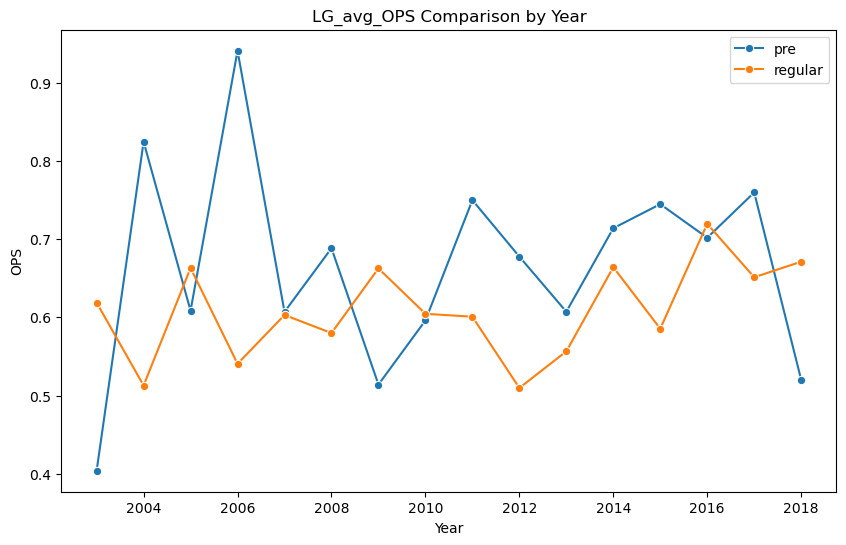

In [189]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(data=LG_avg_OPS, x='year', y='pre', label='pre', marker='o')
sns.lineplot(data=LG_avg_OPS, x='year', y='regular', label='regular', marker='o')

plt.title('LG_avg_OPS Comparison by Year')
plt.xlabel('Year')
plt.ylabel('OPS')
plt.legend()
plt.show()

In [190]:
SK_pre_avg_OPS = SK_pre.groupby('year')['OPS'].mean().reset_index()
SK_pre_avg_OPS.rename(columns = {'OPS':'pre'},inplace=True)

SK_regular_avg_OPS = SK_regular.groupby('year')['OPS'].mean().reset_index()
SK_regular_avg_OPS.rename(columns = {'OPS':'regular'},inplace=True)

SK_avg_OPS = pd.merge(SK_pre_avg_OPS, SK_regular_avg_OPS, on='year', how='outer')
SK_avg_OPS = SK_avg_OPS.sort_values(by='year')

SK_avg_OPS

year       pre   regular
17  2000       NaN  0.000000
18  2001       NaN  0.482098
0   2002  0.783500  0.420000
1   2003  0.427000  0.561371
2   2004  0.473500  0.565883
3   2005  0.538333  0.619544
4   2006  0.827625  0.756970
5   2007  0.692500  0.752365
6   2008  0.655273  0.662651
7   2009  0.557167  0.778398
8   2010  0.687818  0.662001
9   2011  0.708800  0.633239
10  2012  0.767222  0.605156
11  2013  0.659091  0.661714
12  2014  0.726182  0.748968
13  2015  0.559077  0.720857
14  2016  0.670154  0.771601
15  2017  0.552647  0.778644
16  2018  0.706944  0.771250

In [191]:
SK_avg_OPS.dropna(inplace=True)
SK_avg_OPS

year       pre   regular
0   2002  0.783500  0.420000
1   2003  0.427000  0.561371
2   2004  0.473500  0.565883
3   2005  0.538333  0.619544
4   2006  0.827625  0.756970
5   2007  0.692500  0.752365
6   2008  0.655273  0.662651
7   2009  0.557167  0.778398
8   2010  0.687818  0.662001
9   2011  0.708800  0.633239
10  2012  0.767222  0.605156
11  2013  0.659091  0.661714
12  2014  0.726182  0.748968
13  2015  0.559077  0.720857
14  2016  0.670154  0.771601
15  2017  0.552647  0.778644
16  2018  0.706944  0.771250

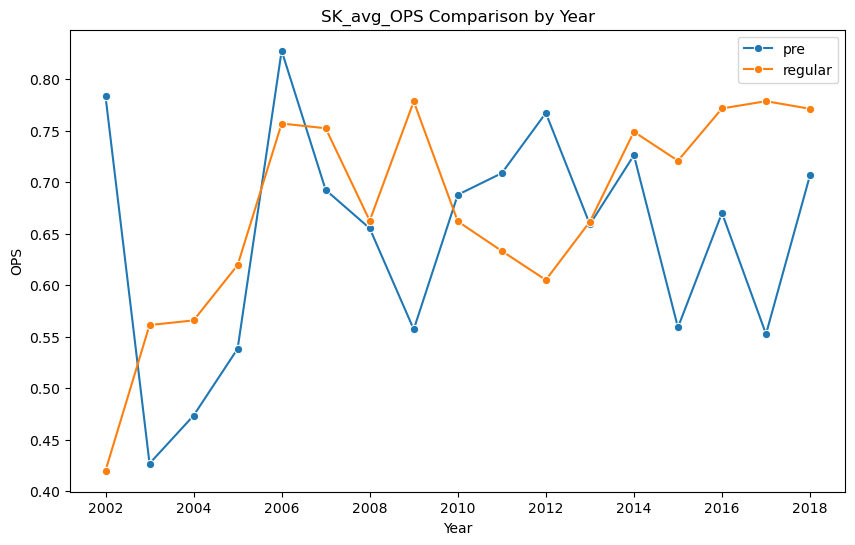

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(data=SK_avg_OPS, x='year', y='pre', label='pre', marker='o')
sns.lineplot(data=SK_avg_OPS, x='year', y='regular', label='regular', marker='o')

plt.title('SK_avg_OPS Comparison by Year')
plt.xlabel('Year')
plt.ylabel('OPS')
plt.legend()
plt.show()

In [193]:
LT_pre_avg_OPS = LT_pre.groupby('year')['OPS'].mean().reset_index()
LT_pre_avg_OPS.rename(columns = {'OPS':'pre'},inplace=True)

LT_regular_avg_OPS = LT_regular.groupby('year')['OPS'].mean().reset_index()
LT_regular_avg_OPS.rename(columns = {'OPS':'regular'},inplace=True)

LT_avg_OPS = pd.merge(LT_pre_avg_OPS, LT_regular_avg_OPS, on='year', how='outer')
LT_avg_OPS = LT_avg_OPS.sort_values(by='year')

LT_avg_OPS

year       pre   regular
17  1999       NaN  1.124961
18  2000       NaN  0.350468
19  2001       NaN  0.619632
0   2002  0.387333  0.523525
1   2003  0.574000  0.595256
2   2004  0.932750  0.516666
3   2005  0.681000  0.648094
4   2006  0.918500  0.608589
5   2007  0.522125  0.593831
6   2008  0.664889  0.700836
7   2009  0.647700  0.661629
8   2010  0.982556  0.653621
9   2011  0.723200  0.629964
10  2012  0.562300  0.581690
11  2013  0.551727  0.539284
12  2014  0.811643  0.633186
13  2015  0.730167  0.546447
14  2016  0.641917  0.680980
15  2017  0.705059  0.687517
16  2018  0.742789  0.706476

In [194]:
LT_avg_OPS.dropna(inplace=True)
LT_avg_OPS

year       pre   regular
0   2002  0.387333  0.523525
1   2003  0.574000  0.595256
2   2004  0.932750  0.516666
3   2005  0.681000  0.648094
4   2006  0.918500  0.608589
5   2007  0.522125  0.593831
6   2008  0.664889  0.700836
7   2009  0.647700  0.661629
8   2010  0.982556  0.653621
9   2011  0.723200  0.629964
10  2012  0.562300  0.581690
11  2013  0.551727  0.539284
12  2014  0.811643  0.633186
13  2015  0.730167  0.546447
14  2016  0.641917  0.680980
15  2017  0.705059  0.687517
16  2018  0.742789  0.706476

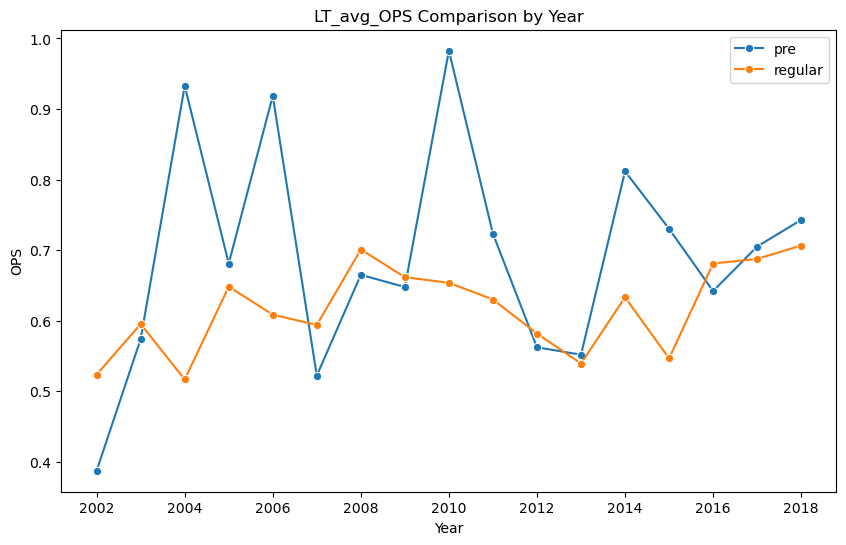

In [195]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(data=LT_avg_OPS, x='year', y='pre', label='pre', marker='o')
sns.lineplot(data=LT_avg_OPS, x='year', y='regular', label='regular', marker='o')

plt.title('LT_avg_OPS Comparison by Year')
plt.xlabel('Year')
plt.ylabel('OPS')
plt.legend()
plt.show()

In [196]:
SS_pre_avg_OPS = SS_pre.groupby('year')['OPS'].mean().reset_index()
SS_pre_avg_OPS.rename(columns = {'OPS':'pre'},inplace=True)

SS_regular_avg_OPS = SS_regular.groupby('year')['OPS'].mean().reset_index()
SS_regular_avg_OPS.rename(columns = {'OPS':'regular'},inplace=True)

SS_avg_OPS = pd.merge(SS_pre_avg_OPS, SS_regular_avg_OPS, on='year', how='outer')
SS_avg_OPS = SS_avg_OPS.sort_values(by='year')

SS_avg_OPS

year       pre   regular
17  1999       NaN  0.575549
18  2000       NaN  0.369048
19  2001       NaN  0.830124
0   2002  0.324667  0.819206
1   2003  0.638500  0.556417
2   2004  0.520750  0.551674
3   2005  0.440000  0.721196
4   2006  0.600500  0.732263
5   2007  0.578500  0.580395
6   2008  0.684333  0.538175
7   2009  0.666889  0.702407
8   2010  0.656222  0.732156
9   2011  0.682727  0.622306
10  2012  0.844545  0.538388
11  2013  0.512833  0.698042
12  2014  0.553091  0.679309
13  2015  0.792923  0.717367
14  2016  0.707077  0.728302
15  2017  0.591375  0.598919
16  2018  0.711389  0.612458

In [197]:
SS_avg_OPS.dropna(inplace=True)
SS_avg_OPS

year       pre   regular
0   2002  0.324667  0.819206
1   2003  0.638500  0.556417
2   2004  0.520750  0.551674
3   2005  0.440000  0.721196
4   2006  0.600500  0.732263
5   2007  0.578500  0.580395
6   2008  0.684333  0.538175
7   2009  0.666889  0.702407
8   2010  0.656222  0.732156
9   2011  0.682727  0.622306
10  2012  0.844545  0.538388
11  2013  0.512833  0.698042
12  2014  0.553091  0.679309
13  2015  0.792923  0.717367
14  2016  0.707077  0.728302
15  2017  0.591375  0.598919
16  2018  0.711389  0.612458

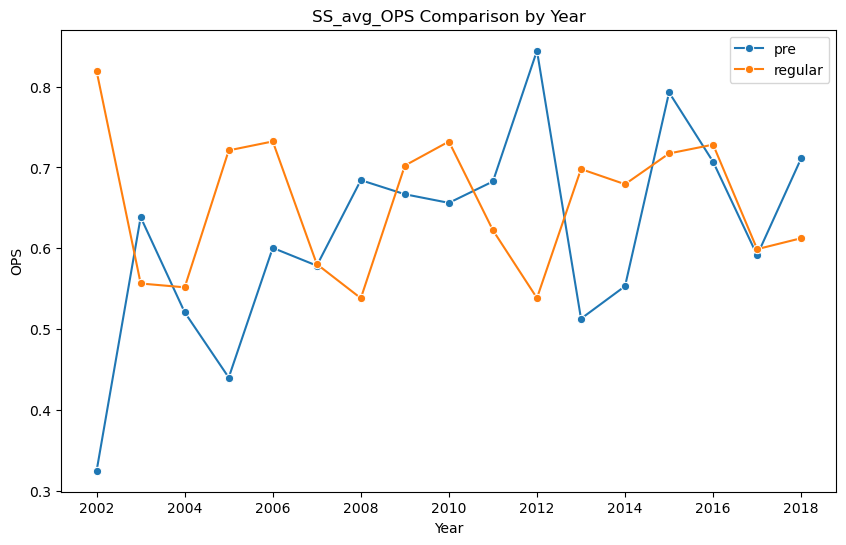

In [198]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(data=SS_avg_OPS, x='year', y='pre', label='pre', marker='o')
sns.lineplot(data=SS_avg_OPS, x='year', y='regular', label='regular', marker='o')

plt.title('SS_avg_OPS Comparison by Year')
plt.xlabel('Year')
plt.ylabel('OPS')
plt.legend()
plt.show()

In [199]:
KIA_pre_avg_OPS = KIA_pre.groupby('year')['OPS'].mean().reset_index()
KIA_pre_avg_OPS.rename(columns = {'OPS':'pre'},inplace=True)

KIA_regular_avg_OPS = KIA_regular.groupby('year')['OPS'].mean().reset_index()
KIA_regular_avg_OPS.rename(columns = {'OPS':'regular'},inplace=True)

KIA_avg_OPS = pd.merge(KIA_pre_avg_OPS, KIA_regular_avg_OPS, on='year', how='outer')
KIA_avg_OPS = KIA_avg_OPS.sort_values(by='year')

KIA_avg_OPS

year       pre   regular
17  2001       NaN  0.861296
0   2002  0.658000  0.816332
1   2003  0.750000  0.630190
2   2004  2.500000  0.702187
3   2005  0.655000  0.520889
4   2006  0.678000  0.697555
5   2007  0.442000  0.552990
6   2008  0.669200  0.642780
7   2009  0.906000  0.694580
8   2010  0.716167  0.682515
9   2011  0.514556  0.697959
10  2012  0.616250  0.598993
11  2013  0.907909  0.643924
12  2014  0.795091  0.764363
13  2015  0.728727  0.590948
14  2016  0.695538  0.717374
15  2017  0.829474  0.692368
16  2018  0.747100  0.685720

In [200]:
KIA_avg_OPS.dropna(inplace=True)
KIA_avg_OPS

year       pre   regular
0   2002  0.658000  0.816332
1   2003  0.750000  0.630190
2   2004  2.500000  0.702187
3   2005  0.655000  0.520889
4   2006  0.678000  0.697555
5   2007  0.442000  0.552990
6   2008  0.669200  0.642780
7   2009  0.906000  0.694580
8   2010  0.716167  0.682515
9   2011  0.514556  0.697959
10  2012  0.616250  0.598993
11  2013  0.907909  0.643924
12  2014  0.795091  0.764363
13  2015  0.728727  0.590948
14  2016  0.695538  0.717374
15  2017  0.829474  0.692368
16  2018  0.747100  0.685720

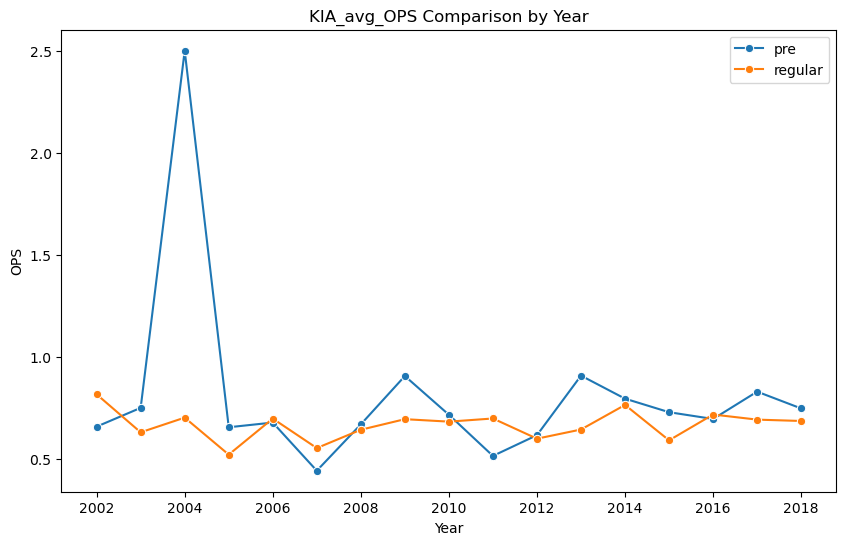

In [201]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(data=KIA_avg_OPS, x='year', y='pre', label='pre', marker='o')
sns.lineplot(data=KIA_avg_OPS, x='year', y='regular', label='regular', marker='o')

plt.title('KIA_avg_OPS Comparison by Year')
plt.xlabel('Year')
plt.ylabel('OPS')
plt.legend()
plt.show()

In [202]:
HH_pre_avg_OPS = HH_pre.groupby('year')['OPS'].mean().reset_index()
HH_pre_avg_OPS.rename(columns = {'OPS':'pre'},inplace=True)

HH_regular_avg_OPS = HH_regular.groupby('year')['OPS'].mean().reset_index()
HH_regular_avg_OPS.rename(columns = {'OPS':'regular'},inplace=True)

HH_avg_OPS = pd.merge(HH_pre_avg_OPS, HH_regular_avg_OPS, on='year', how='outer')
HH_avg_OPS = HH_avg_OPS.sort_values(by='year')

HH_avg_OPS

year       pre   regular
17  1996       NaN  0.890260
18  1997       NaN  0.768116
19  1998       NaN  0.456915
20  1999       NaN  0.512775
21  2000       NaN  0.503897
22  2001       NaN  0.853838
0   2002  0.652000  0.661039
1   2003  0.731500  0.599668
2   2004  0.750250  0.612157
3   2005  1.638333  0.605261
4   2006  0.712000  0.610810
5   2007  0.587400  0.627992
6   2008  0.574857  0.551132
7   2009  0.796571  0.631518
8   2010  0.761167  0.605396
9   2011  0.571000  0.622209
10  2012  0.609500  0.584965
11  2013  0.674125  0.526252
12  2014  0.525200  0.642527
13  2015  0.608625  0.690590
14  2016  0.597867  0.607198
15  2017  0.643533  0.633855
16  2018  0.689667  0.683783

In [203]:
HH_avg_OPS.dropna(inplace=True)
HH_avg_OPS

year       pre   regular
0   2002  0.652000  0.661039
1   2003  0.731500  0.599668
2   2004  0.750250  0.612157
3   2005  1.638333  0.605261
4   2006  0.712000  0.610810
5   2007  0.587400  0.627992
6   2008  0.574857  0.551132
7   2009  0.796571  0.631518
8   2010  0.761167  0.605396
9   2011  0.571000  0.622209
10  2012  0.609500  0.584965
11  2013  0.674125  0.526252
12  2014  0.525200  0.642527
13  2015  0.608625  0.690590
14  2016  0.597867  0.607198
15  2017  0.643533  0.633855
16  2018  0.689667  0.683783

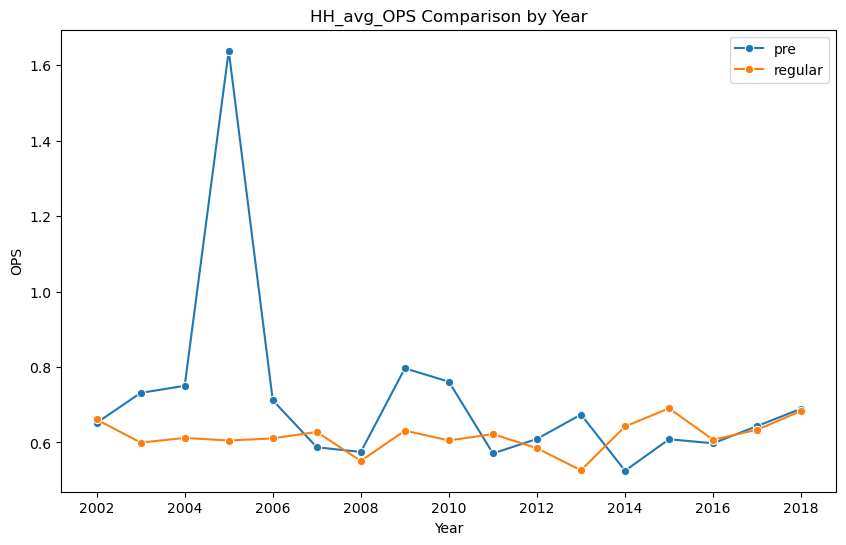

In [204]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(data=HH_avg_OPS, x='year', y='pre', label='pre', marker='o')
sns.lineplot(data=HH_avg_OPS, x='year', y='regular', label='regular', marker='o')

plt.title('HH_avg_OPS Comparison by Year')
plt.xlabel('Year')
plt.ylabel('OPS')
plt.legend()
plt.show()

In [205]:
NX_pre_avg_OPS = NX_pre.groupby('year')['OPS'].mean().reset_index()
NX_pre_avg_OPS.rename(columns = {'OPS':'pre'},inplace=True)

NX_regular_avg_OPS = NX_regular.groupby('year')['OPS'].mean().reset_index()
NX_regular_avg_OPS.rename(columns = {'OPS':'regular'},inplace=True)

NX_avg_OPS = pd.merge(NX_pre_avg_OPS, NX_regular_avg_OPS, on='year', how='outer')
NX_avg_OPS = NX_avg_OPS.sort_values(by='year')

NX_avg_OPS

year       pre   regular
0   2008  0.402333  0.526328
1   2009  0.542400  0.560414
2   2010  0.755333  0.577718
3   2011  0.726375  0.555598
4   2012  0.783778  0.593756
5   2013  0.717250  0.637322
6   2014  0.692357  0.730110
7   2015  0.652250  0.735878
8   2016  0.570588  0.760597
9   2017  0.734437  0.719181
10  2018  0.822714  0.731619

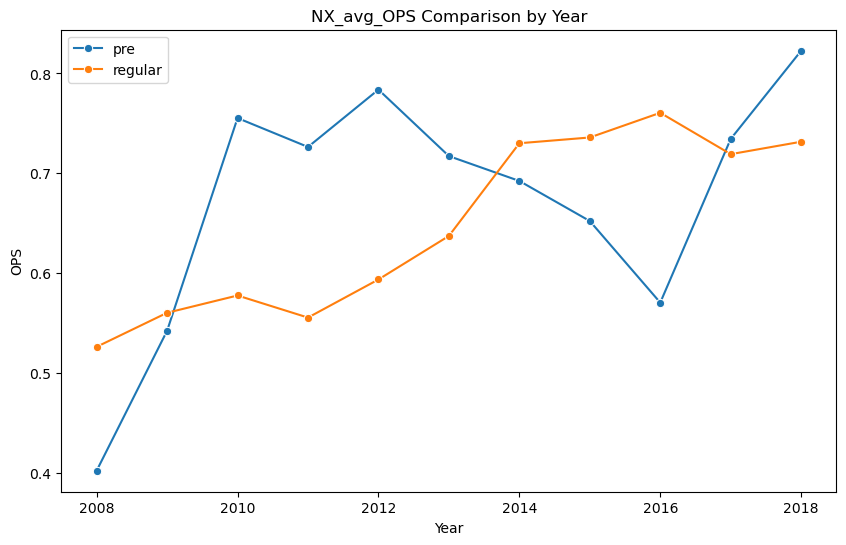

In [206]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(data=NX_avg_OPS, x='year', y='pre', label='pre', marker='o')
sns.lineplot(data=NX_avg_OPS, x='year', y='regular', label='regular', marker='o')

plt.title('NX_avg_OPS Comparison by Year')
plt.xlabel('Year')
plt.ylabel('OPS')
plt.legend()
plt.show()

In [207]:
NC_pre_avg_OPS = NC_pre.groupby('year')['OPS'].mean().reset_index()
NC_pre_avg_OPS.rename(columns = {'OPS':'pre'},inplace=True)

NC_regular_avg_OPS = NC_regular.groupby('year')['OPS'].mean().reset_index()
NC_regular_avg_OPS.rename(columns = {'OPS':'regular'},inplace=True)

NC_avg_OPS = pd.merge(NC_pre_avg_OPS, NC_regular_avg_OPS, on='year', how='outer')
NC_avg_OPS = NC_avg_OPS.sort_values(by='year')

NC_avg_OPS

year       pre   regular
0  2013  0.665556  0.630406
1  2014  0.660167  0.594825
2  2015  0.520417  0.617672
3  2016  0.616500  0.674495
4  2017  0.724471  0.629106
5  2018  0.939526  0.625519

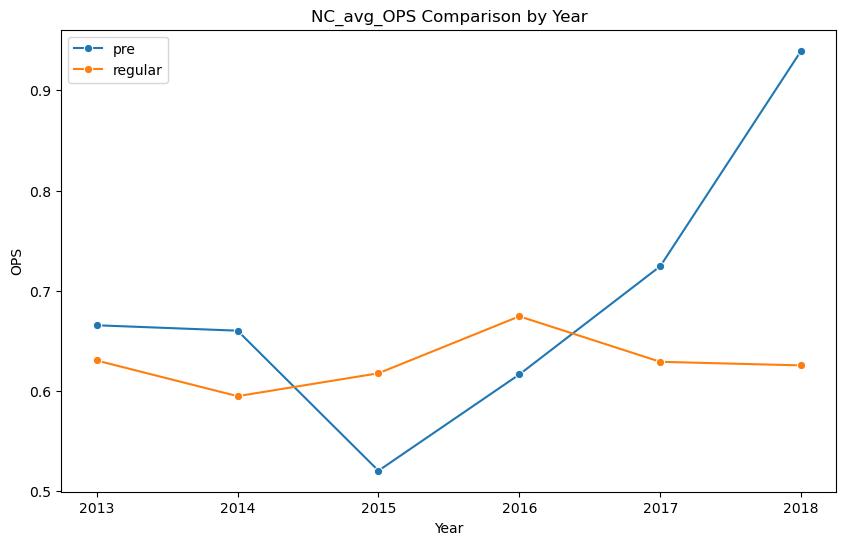

In [208]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(data=NC_avg_OPS, x='year', y='pre', label='pre', marker='o')
sns.lineplot(data=NC_avg_OPS, x='year', y='regular', label='regular', marker='o')

plt.title('NC_avg_OPS Comparison by Year')
plt.xlabel('Year')
plt.ylabel('OPS')
plt.legend()
plt.show()

In [209]:
KT_pre_avg_OPS = KT_pre.groupby('year')['OPS'].mean().reset_index()
KT_pre_avg_OPS.rename(columns = {'OPS':'pre'},inplace=True)

KT_regular_avg_OPS = KT_regular.groupby('year')['OPS'].mean().reset_index()
KT_regular_avg_OPS.rename(columns = {'OPS':'regular'},inplace=True)

KT_avg_OPS = pd.merge(KT_pre_avg_OPS, KT_regular_avg_OPS, on='year', how='outer')
KT_avg_OPS = KT_avg_OPS.sort_values(by='year')

KT_avg_OPS

year       pre   regular
0  2015  0.551000  0.581687
1  2016  0.566615  0.603639
2  2017  0.810133  0.673375
3  2018  0.773000  0.560391

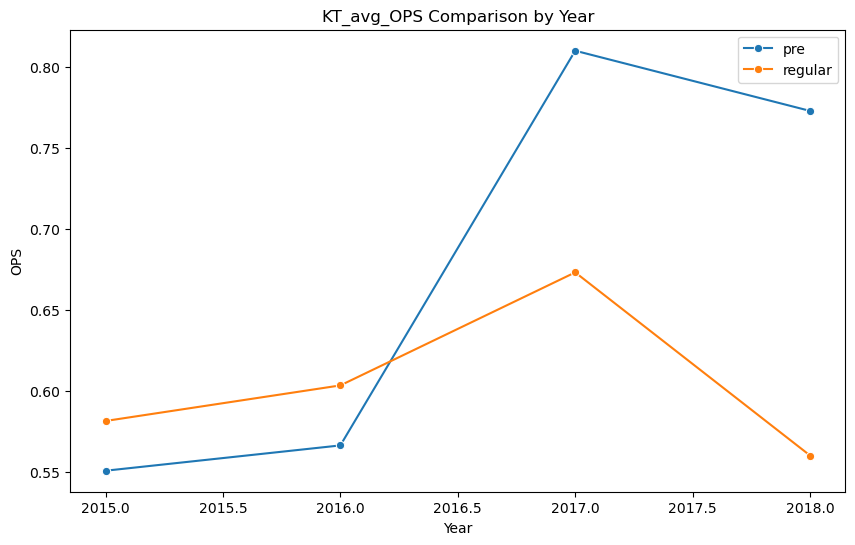

In [210]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(data=KT_avg_OPS, x='year', y='pre', label='pre', marker='o')
sns.lineplot(data=KT_avg_OPS, x='year', y='regular', label='regular', marker='o')

plt.title('KT_avg_OPS Comparison by Year')
plt.xlabel('Year')
plt.ylabel('OPS')
plt.legend()
plt.show()

# Regression

In [262]:
# numeric_pre = pre_season.select_dtypes(include=['int', 'float'])
# corr_matrix_pre = numeric_pre.corr(method='spearman')  # Use 'spearman' method here
# spearman_corr_ops = corr_matrix_pre['OPS'].sort_values(ascending=False)

# print(spearman_corr_ops)

OPS          1.000000
SLG          0.959429
OBP          0.873852
TB           0.656425
H            0.579951
RBI          0.503771
HR           0.476211
R            0.464002
2B           0.448435
BB           0.300217
AB           0.239445
weight       0.178765
3B           0.170628
BMI          0.162124
G            0.143649
age          0.142145
height       0.132144
HBP          0.120513
SB           0.114793
GDP          0.070426
CS           0.069290
SO           0.065507
year         0.065128
E            0.027325
batter_id   -0.058657
Name: OPS, dtype: float64


In [267]:
from scipy.stats import shapiro
print(shapiro(pre_season['OPS']))
print(shapiro(regular_season['OPS']))

ShapiroResult(statistic=0.8567758798599243, pvalue=1.5977210850491065e-33)
ShapiroResult(statistic=0.8873721957206726, pvalue=6.81657013685875e-39)


In [268]:
numeric_pre = pre_season.select_dtypes(include=['int', 'float'])
corr_matrix_pre = numeric_pre.corr(method='spearman')
corr_matrix_pre['OPS'].sort_values(ascending=False)

OPS          1.000000
SLG          0.959429
OBP          0.873852
TB           0.656425
H            0.579951
RBI          0.503771
HR           0.476211
R            0.464002
2B           0.448435
BB           0.300217
AB           0.239445
weight       0.178765
3B           0.170628
BMI          0.162124
G            0.143649
age          0.142145
height       0.132144
HBP          0.120513
SB           0.114793
GDP          0.070426
CS           0.069290
SO           0.065507
year         0.065128
E            0.027325
batter_id   -0.058657
Name: OPS, dtype: float64

In [269]:
numeric_regular = regular_season.select_dtypes(include=['int', 'float'])
corr_matrix_regular = numeric_regular.corr(method='spearman')
corr_matrix_regular['OPS'].sort_values(ascending=False)

OPS          1.000000
SLG          0.974123
OBP          0.913712
avg          0.906927
TB           0.763404
RBI          0.756007
HR           0.755044
H            0.734976
2B           0.723671
R            0.710889
BB           0.699854
AB           0.669967
SO           0.613466
G            0.604743
GDP          0.595980
HBP          0.561819
SB           0.404645
CS           0.396739
3B           0.384942
E            0.381253
BMI          0.270972
weight       0.269178
age          0.265924
height       0.158437
year         0.090208
batter_id   -0.046349
Name: OPS, dtype: float64

OPS는 정규성을 띄지 않고, 상관계수가 높은 변수가 OBP와 SLG밖에 없어서, OBP와 SLG에 대한 회귀분석으로 OPS를 두 변수로 나누어 예측할 수 있도록 한다.

In [271]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

selected_data = pre_season[['OPS', 'SLG', 'OBP']].dropna()

X = selected_data[['SLG', 'OBP']]
y = selected_data['OPS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# 테스트 데이터에 대한 예측 성능 평가
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# 모델에 사용된 회귀 계수(coefficients) 및 절편(intercept) 확인
coefficients = model.coef_
intercept = model.intercept_
print(f'Regression Coefficients: {coefficients}')
print(f'Regression Intercept: {intercept}')


Mean Squared Error: 4.8702182746066555e-31
Regression Coefficients: [1. 1.]
Regression Intercept: 1.2212453270876722e-15


In [284]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

selected_data = regular_season[['OPS', 'SLG', 'OBP']].dropna()

X = selected_data[['SLG', 'OBP']]
y = selected_data['OPS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# 테스트 데이터에 대한 예측 성능 평가
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# 모델에 사용된 회귀 계수(coefficients) 및 절편(intercept) 확인
coefficients = model.coef_
intercept = model.intercept_
print(f'Regression Coefficients: {coefficients}')
print(f'Regression Intercept: {intercept}')


Mean Squared Error: 6.227173486852062e-32
Regression Coefficients: [1. 1.]
Regression Intercept: 5.551115123125783e-16


SLG와 OBP에 대한 회귀분석

In [270]:
print(shapiro(pre_season['SLG']))
print(shapiro(pre_season['OBP']))
print(shapiro(regular_season['SLG']))
print(shapiro(regular_season['OBP']))

ShapiroResult(statistic=nan, pvalue=1.0)
ShapiroResult(statistic=0.9399523735046387, pvalue=4.221240142225775e-23)
ShapiroResult(statistic=nan, pvalue=1.0)
ShapiroResult(statistic=0.8476666212081909, pvalue=2.059908742557481e-43)


Text(0.5, 1.0, "pre season's OBP")

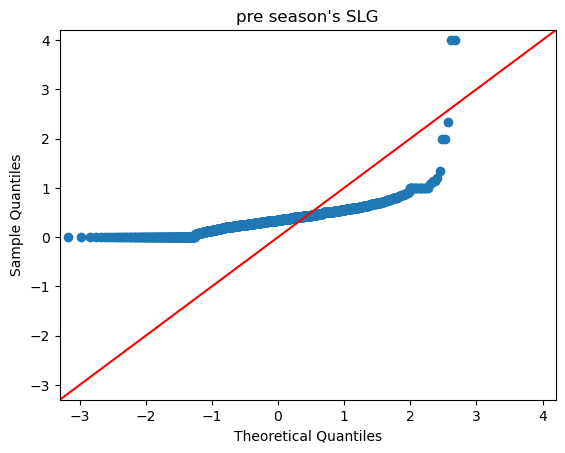

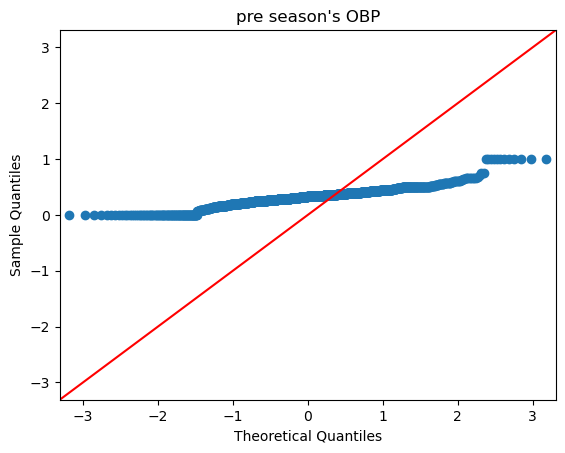

In [274]:
import statsmodels.api as sm
sm.qqplot(pre_season['SLG'], line='45')
plt.title("pre season's SLG")

sm.qqplot(pre_season['OBP'], line='45')
plt.title("pre season's OBP")

Text(0.5, 1.0, "regular season's OBP")

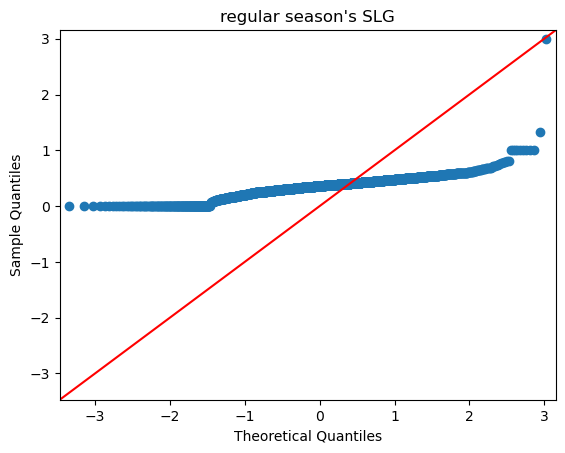

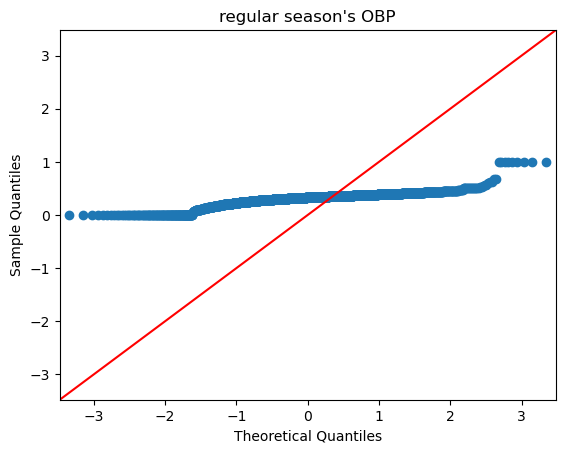

In [275]:
sm.qqplot(regular_season['SLG'], line='45')
plt.title("regular season's SLG")

sm.qqplot(regular_season['OBP'], line='45')
plt.title("regular season's OBP")

In [251]:
pre_season.dtypes

batter_id                   int64
batter_name                object
year                        int64
team                       object
avg                        object
G                           int64
AB                          int64
R                           int64
H                           int64
2B                          int64
3B                          int64
HR                          int64
TB                          int64
RBI                         int64
SB                          int64
CS                          int64
BB                          int64
HBP                         int64
SO                          int64
GDP                         int64
SLG                       float64
OBP                       float64
E                           int64
height/weight              object
year_born          datetime64[ns]
position                   object
career                     object
starting_salary            object
OPS                       float64
height        

In [254]:
numeric_pre = pre_season.select_dtypes(include=['int', 'float'])
corr_matrix_pre = numeric_pre.corr()
corr_matrix_pre['SLG'].sort_values(ascending=False)

SLG          1.000000
OPS          0.961944
OBP          0.695413
TB           0.458217
HR           0.458202
RBI          0.391809
H            0.352125
2B           0.300189
R            0.273436
weight       0.163183
BMI          0.145630
3B           0.137567
AB           0.131580
height       0.119804
BB           0.095311
age          0.078129
GDP          0.036832
G            0.032576
year         0.028628
SB           0.027015
CS           0.020083
HBP          0.016472
SO           0.015361
E            0.012294
batter_id   -0.061220
Name: SLG, dtype: float64

In [256]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

selected_data = LG_pre[['SLG', 'OBP', 'TB', 'HR', 'RBI']].dropna()

# 학습 데이터와 테스트 데이터로 분리
X = selected_data[['OBP', 'TB', 'HR', 'RBI']]
y = selected_data['SLG']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 다중 선형 회귀 모델 생성
model = LinearRegression()

# 모델 학습
model.fit(X_train, y_train)

# 모델 예측
y_pred = model.predict(X_test)

# 테스트 데이터에 대한 예측 성능 평가
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# 모델에 사용된 회귀 계수(coefficients) 및 절편(intercept) 확인
coefficients = model.coef_
intercept = model.intercept_
print(f'Regression Coefficients: {coefficients}')
print(f'Regression Intercept: {intercept}')

Mean Squared Error: 0.012924776201581376
Regression Coefficients: [0.80056157 0.00797397 0.07628106 0.0044555 ]
Regression Intercept: -0.014267204365428887


In [276]:
corr_matrix_pre['OBP'].sort_values(ascending=False)

OBP          1.000000
OPS          0.873852
SLG          0.715679
H            0.483276
TB           0.470390
BB           0.435948
R            0.383524
RBI          0.330416
2B           0.318117
HR           0.220548
HBP          0.207782
age          0.157504
AB           0.155378
SB           0.150941
G            0.123587
weight       0.105764
BMI          0.105480
CS           0.088040
year         0.084863
height       0.072410
3B           0.063603
GDP          0.041066
SO           0.004844
E           -0.005789
batter_id   -0.058957
Name: OBP, dtype: float64

In [277]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

selected_data = LG_pre[['OBP', 'SLG', 'H', 'TB', 'BB']].dropna()

# 학습 데이터와 테스트 데이터로 분리
X = selected_data[['SLG', 'H', 'TB', 'BB']]
y = selected_data['OBP']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 다중 선형 회귀 모델 생성
model = LinearRegression()

# 모델 학습
model.fit(X_train, y_train)

# 모델 예측
y_pred = model.predict(X_test)

# 테스트 데이터에 대한 예측 성능 평가
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# 모델에 사용된 회귀 계수(coefficients) 및 절편(intercept) 확인
coefficients = model.coef_
intercept = model.intercept_
print(f'Regression Coefficients: {coefficients}')
print(f'Regression Intercept: {intercept}')

Mean Squared Error: 0.005791220451442555
Regression Coefficients: [ 0.73830377  0.02986679 -0.02872058  0.0241318 ]
Regression Intercept: 0.07583830328157043


In [278]:
numeric_regular = regular_season.select_dtypes(include=['int', 'float'])
corr_matrix_regular = numeric_regular.corr()
corr_matrix_regular['SLG'].sort_values(ascending=False)

SLG          1.000000
OPS          0.971387
avg          0.868183
OBP          0.825292
TB           0.602306
RBI          0.597178
HR           0.575835
H            0.566842
2B           0.566631
R            0.556065
AB           0.540886
BB           0.522548
G            0.516975
SO           0.516773
GDP          0.458855
HBP          0.407157
E            0.280233
3B           0.261314
CS           0.255308
weight       0.228636
BMI          0.221308
SB           0.214874
age          0.194571
height       0.124277
year         0.048796
batter_id   -0.036928
Name: SLG, dtype: float64

In [279]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

selected_data = LG_pre[['SLG', 'avg', 'OBP', 'TB', 'RBI']].dropna()

# 학습 데이터와 테스트 데이터로 분리
X = selected_data[['avg', 'OBP', 'TB', 'RBI']]
y = selected_data['SLG']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 다중 선형 회귀 모델 생성
model = LinearRegression()

# 모델 학습
model.fit(X_train, y_train)

# 모델 예측
y_pred = model.predict(X_test)

# 테스트 데이터에 대한 예측 성능 평가
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# 모델에 사용된 회귀 계수(coefficients) 및 절편(intercept) 확인
coefficients = model.coef_
intercept = model.intercept_
print(f'Regression Coefficients: {coefficients}')
print(f'Regression Intercept: {intercept}')

Mean Squared Error: 0.013019788317929498
Regression Coefficients: [0.88444806 0.22327955 0.00735627 0.01279366]
Regression Intercept: -0.02969730692924749


In [281]:
corr_matrix_regular['OBP'].sort_values(ascending=False)

OBP          1.000000
OPS          0.926996
avg          0.898050
SLG          0.825292
BB           0.510066
H            0.503413
TB           0.494824
R            0.488408
G            0.486954
AB           0.483047
RBI          0.471904
2B           0.470049
SO           0.426553
GDP          0.403134
HR           0.385169
HBP          0.379483
CS           0.286016
SB           0.245301
3B           0.244860
E            0.241891
age          0.225599
BMI          0.131557
weight       0.124219
year         0.059733
height       0.041133
batter_id   -0.033690
Name: OBP, dtype: float64

In [283]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

selected_data = LG_pre[['OBP', 'avg', 'SLG', 'BB', 'H']].dropna()

# 학습 데이터와 테스트 데이터로 분리
X = selected_data[['avg', 'SLG', 'BB', 'H']]
y = selected_data['OBP']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 다중 선형 회귀 모델 생성
model = LinearRegression()

# 모델 학습
model.fit(X_train, y_train)

# 모델 예측
y_pred = model.predict(X_test)

# 테스트 데이터에 대한 예측 성능 평가
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# 모델에 사용된 회귀 계수(coefficients) 및 절편(intercept) 확인
coefficients = model.coef_
intercept = model.intercept_
print(f'Regression Coefficients: {coefficients}')
print(f'Regression Intercept: {intercept}')

Mean Squared Error: 0.003665506350335372
Regression Coefficients: [ 0.97319367  0.05403515  0.02384393 -0.00974834]
Regression Intercept: 0.06763486200026292


상관관계